## House Prices - Advanced Regression Techniques
Goal：Predict house prices based on features

### Steps：

1. Get data 

2. Preprocessing
- continuous, categorical features
- distibution
- Missing value
- outliers

3. Feature engineering
- feature scaling

4. Model Training
- Regression
- Essemble learning

5. Evaluation, Model Tuning

6. Submit


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [140]:
# load data: train and test data
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [141]:
# Data size
print("The training data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

# Keep ID column
train_ID = df_train['Id']
test_ID = df_test['Id']

# remove ID
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#看一下现在的数据的shape
print("\nThe training data size after dropping Id is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id is : {} ".format(df_test.shape))

The training data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The training data size after dropping Id is : (1460, 80) 
The test data size after dropping Id is : (1459, 79) 


In [142]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

### Data description
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

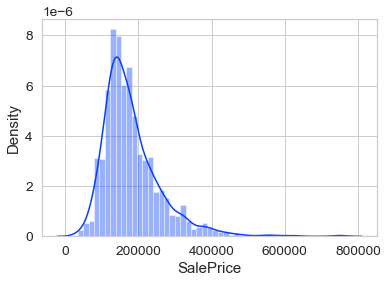

In [143]:
# Target, Dependent variable
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('bright'))
sns.distplot(df_train['SalePrice']);

In [144]:
# Right-skewed?
print("Skewness: {}".format(df_train['SalePrice'].skew()))

Skewness: 1.8828757597682129


In [145]:
# Exploratory data analysis
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

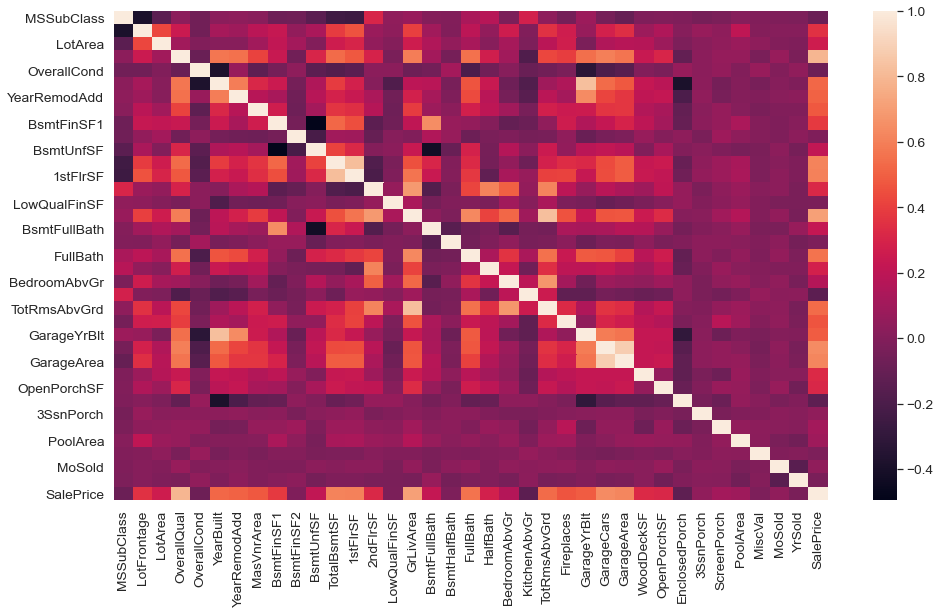

In [146]:
# correlation matrix
corr_mat = df_train.corr()
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_mat);

In [147]:
print(corr_mat['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


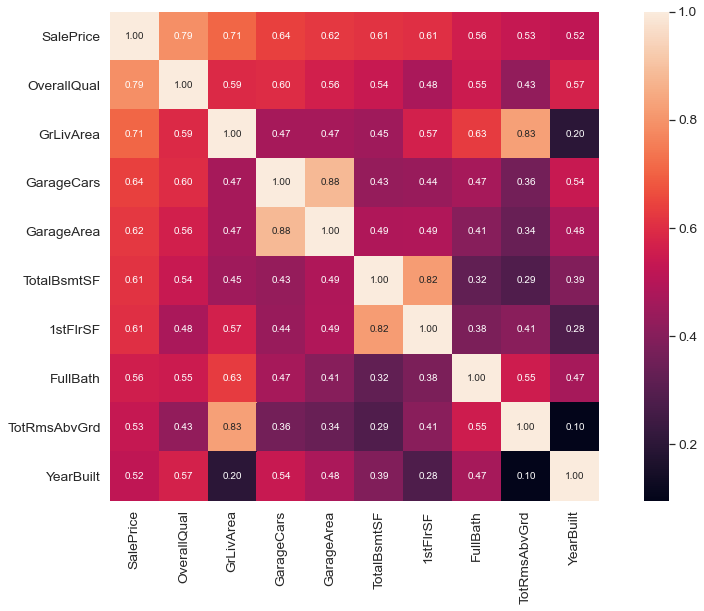

In [148]:
# look closer
k = 10
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
fig, ax = plt.subplots(figsize=(16, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

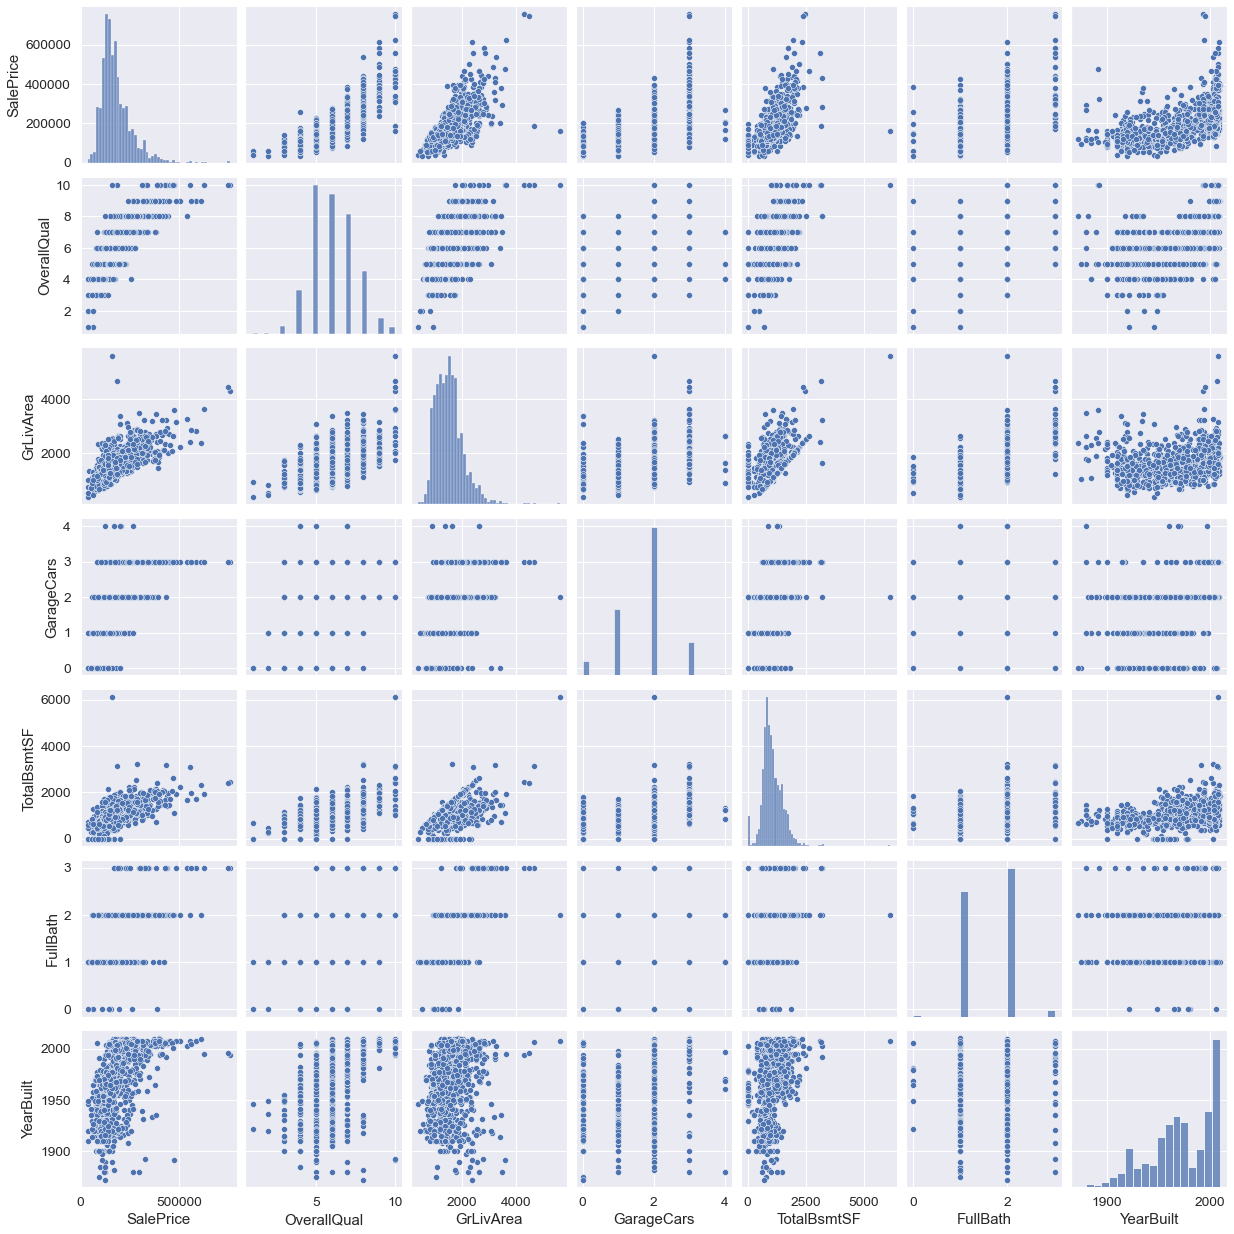

In [149]:
# scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show();

In [150]:
# numerical and categorical features
numerical_train = df_train.select_dtypes(['int64', 'float64'])
categorical_train = df_train.select_dtypes(['object'])
numerical_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [151]:
numerical_cols = numerical_train.columns[:-1]
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [152]:
categorical_train.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [153]:
categorical_cols = categorical_train.columns
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Preprocessing

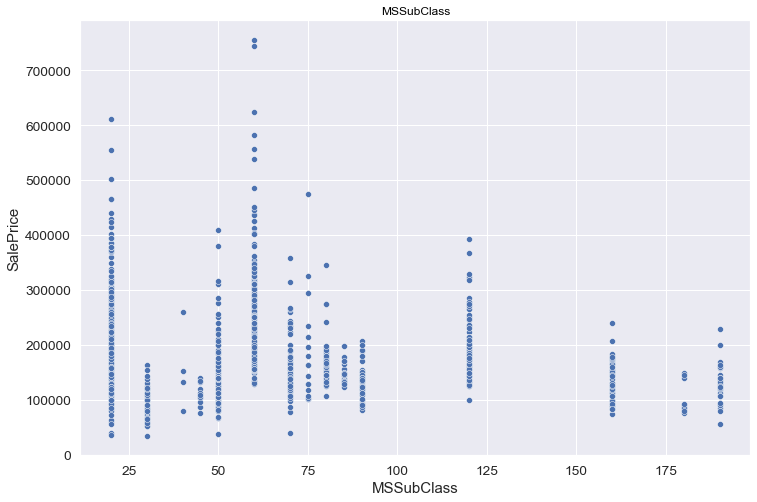

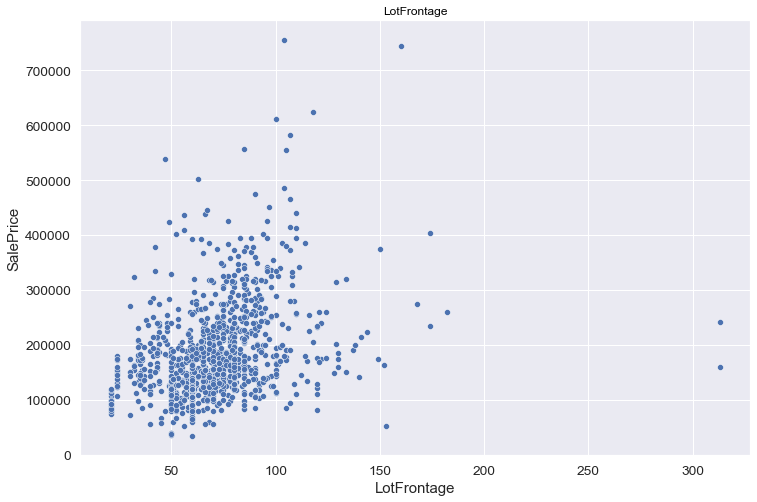

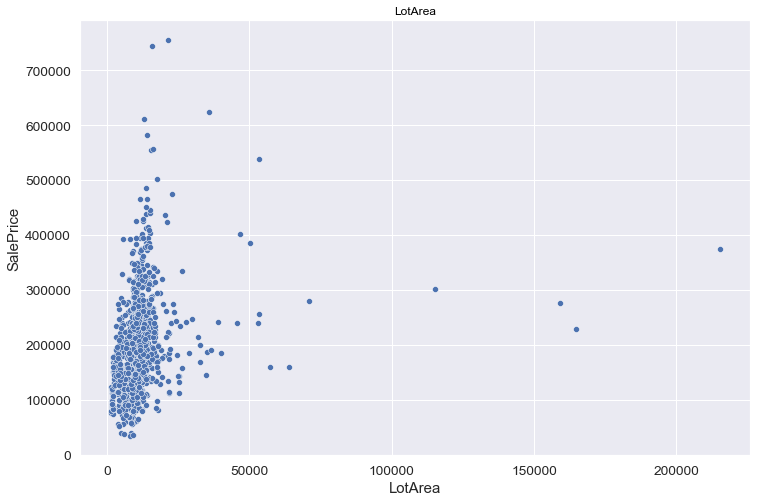

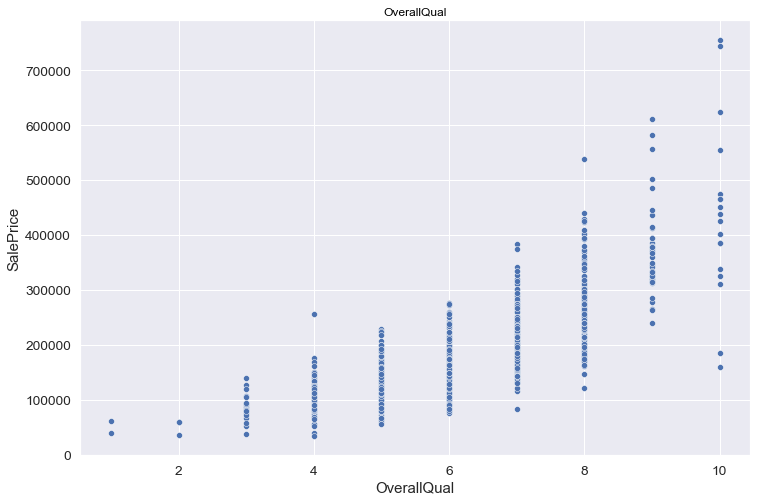

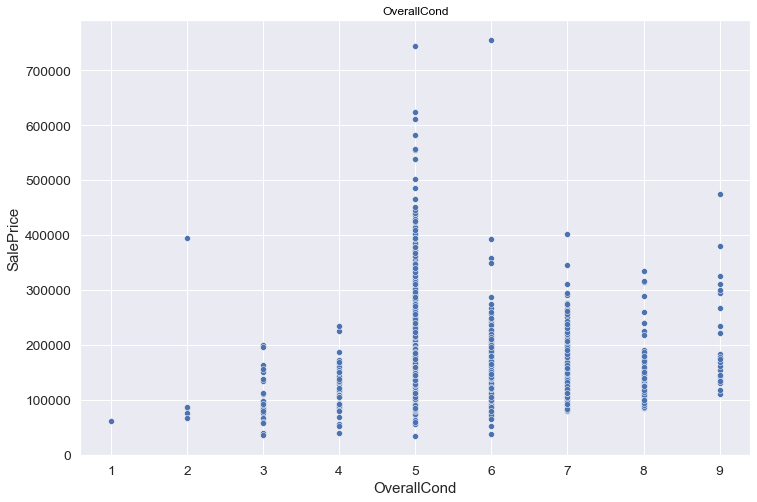

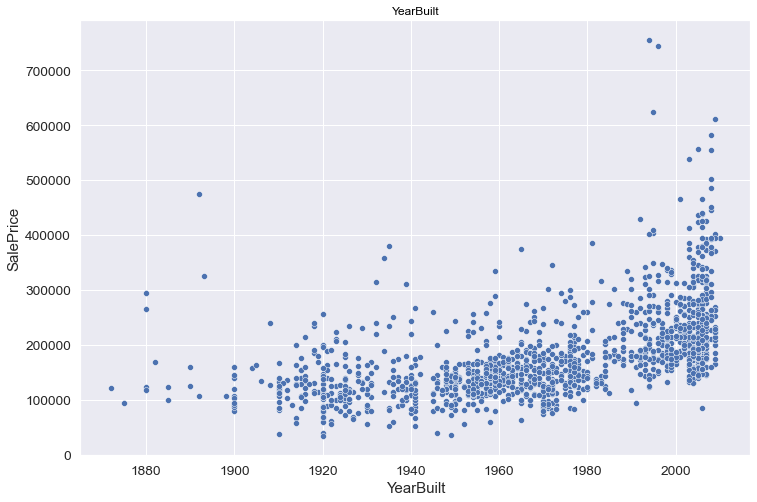

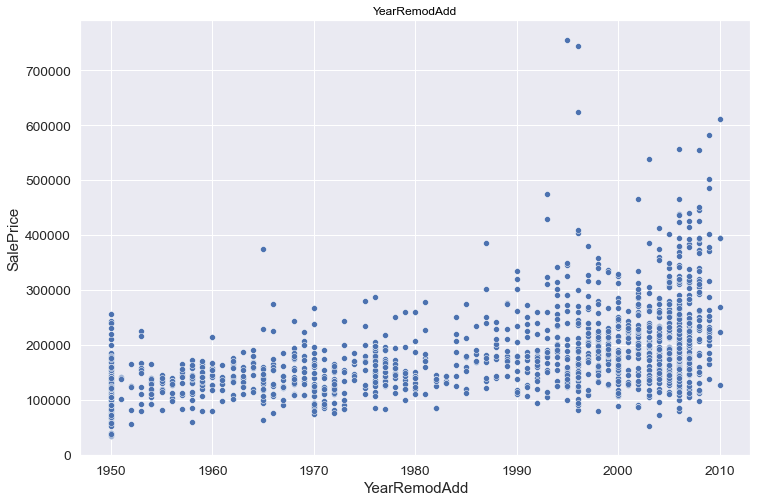

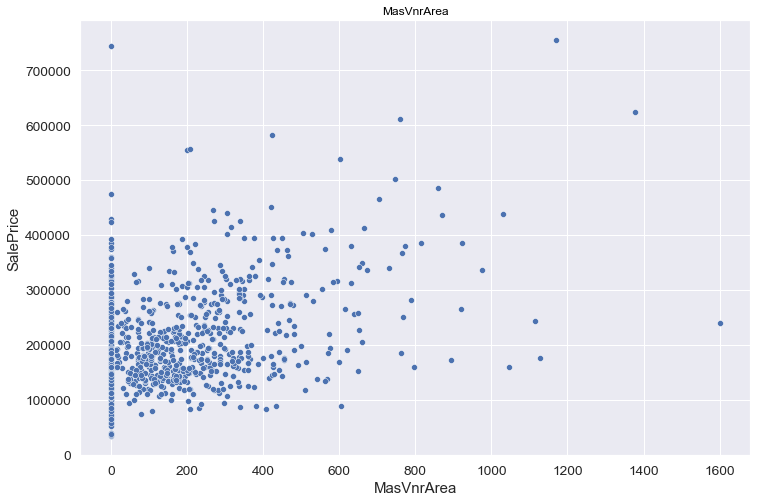

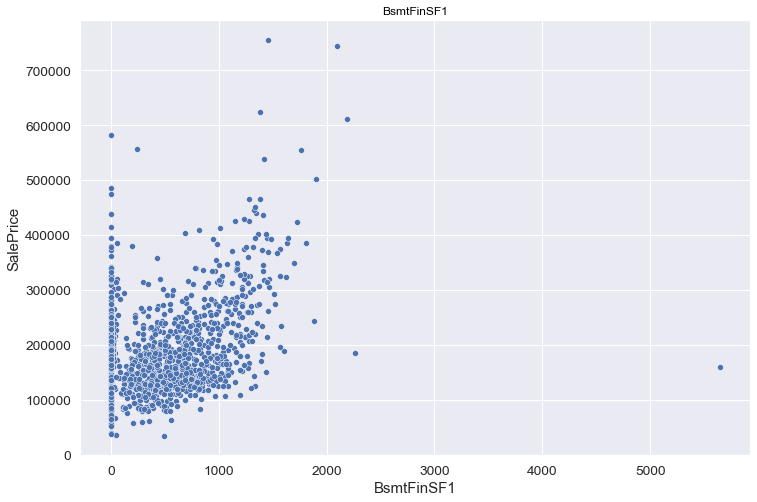

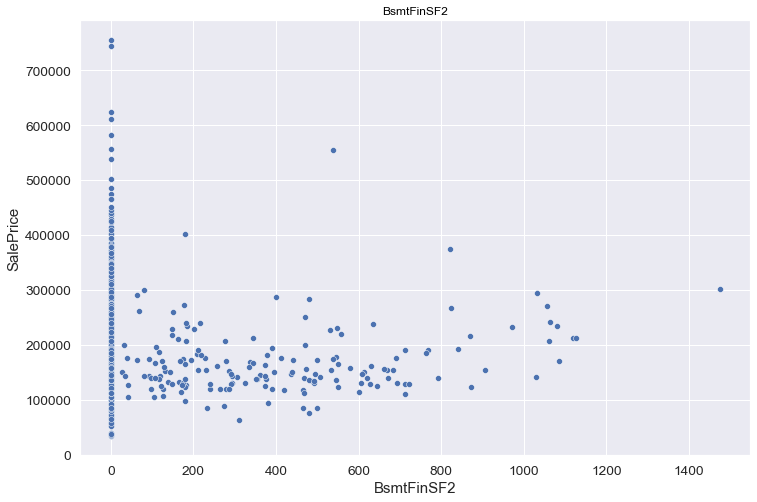

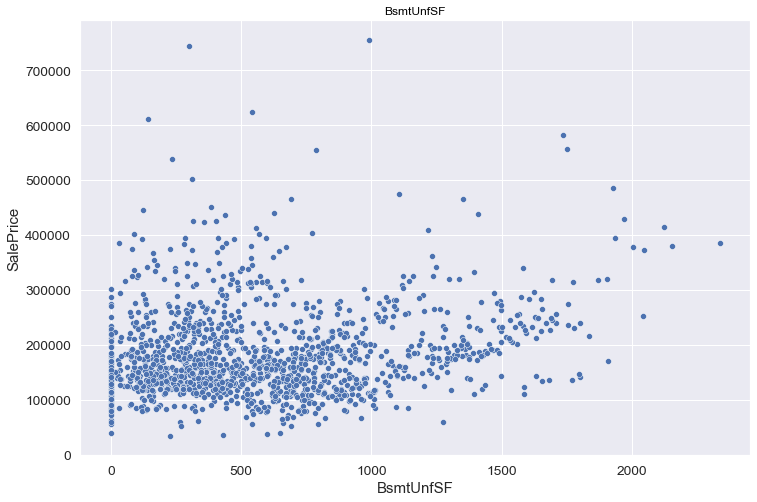

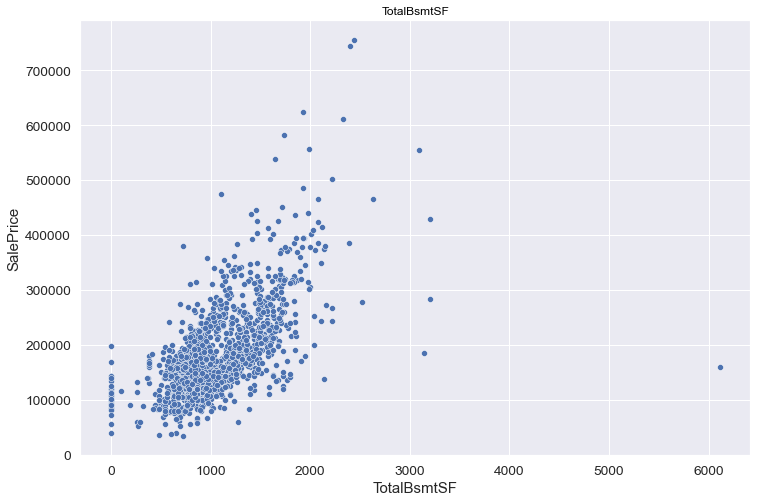

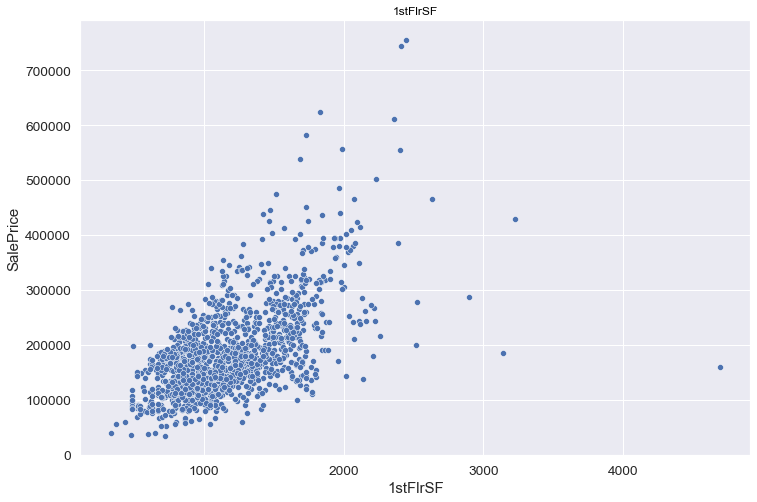

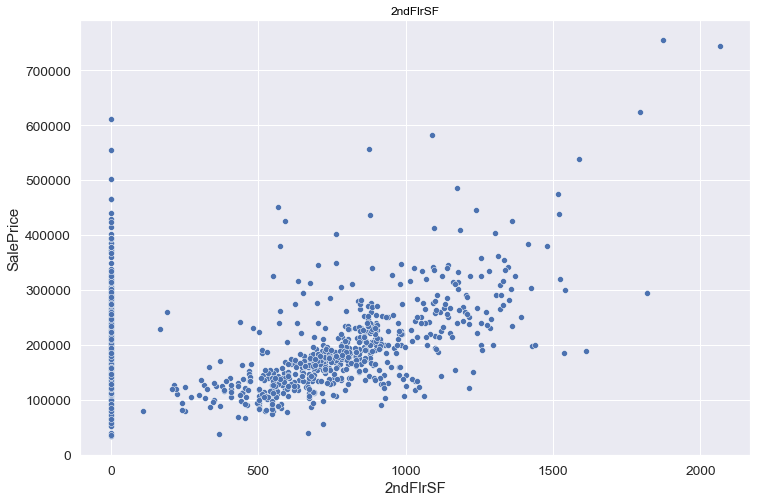

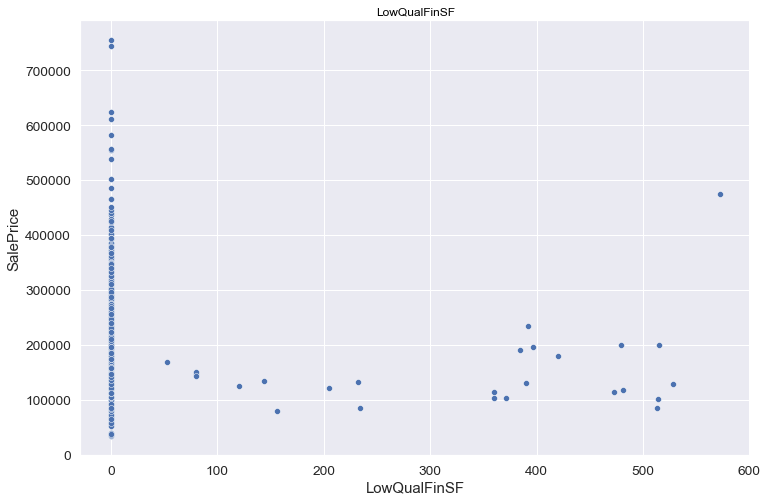

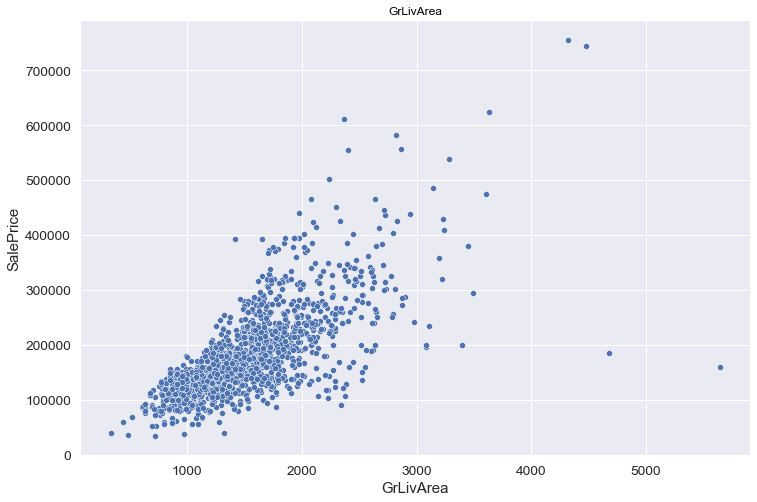

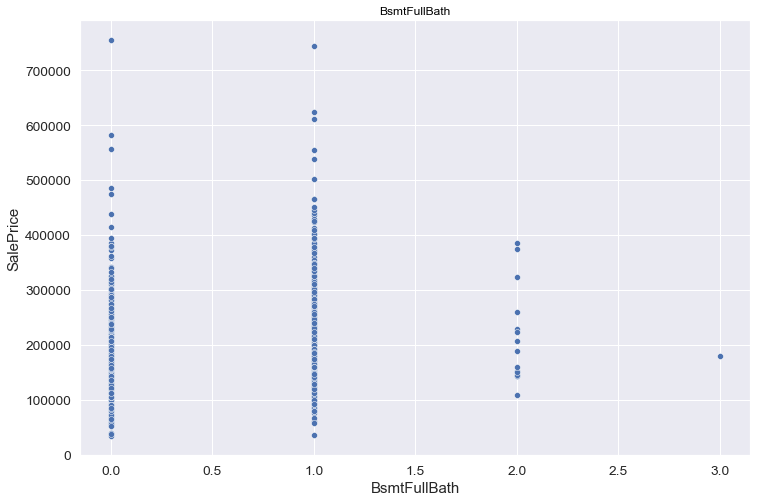

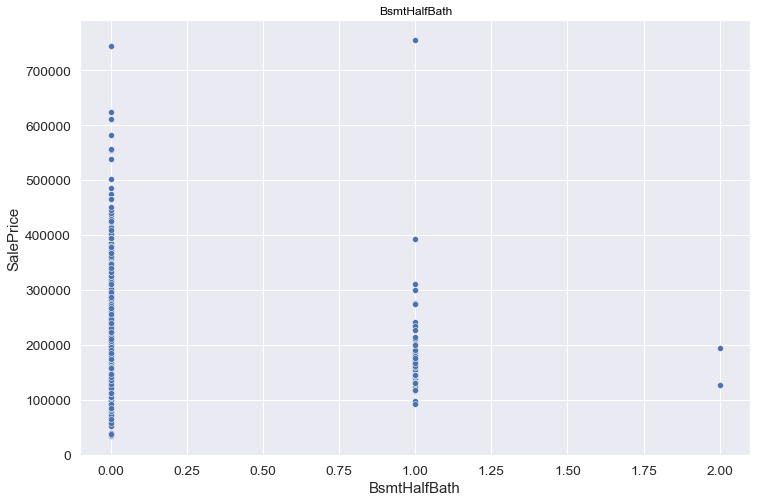

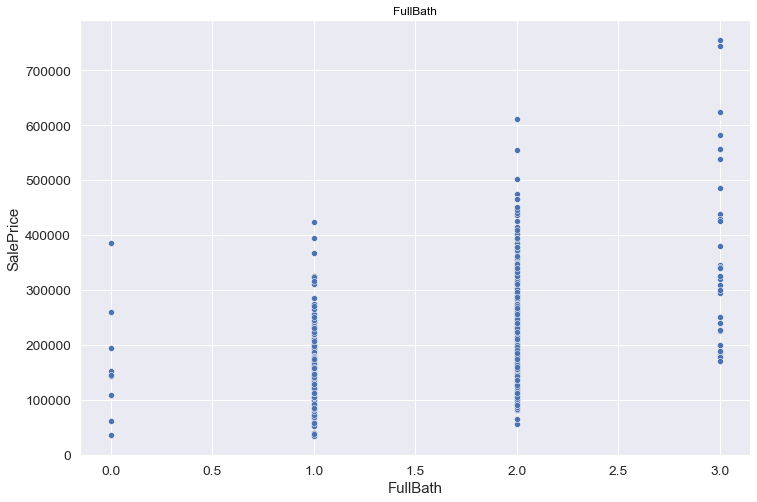

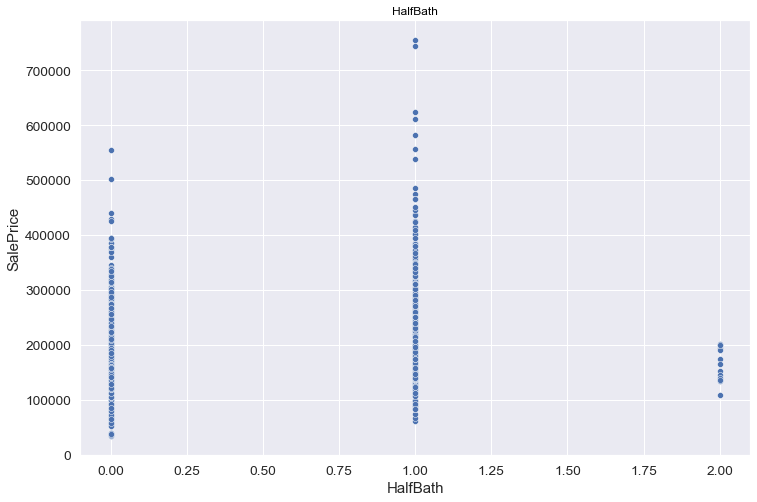

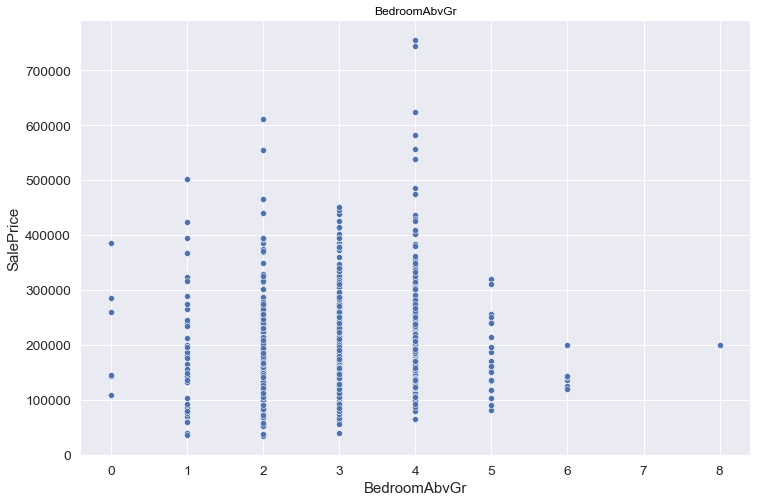

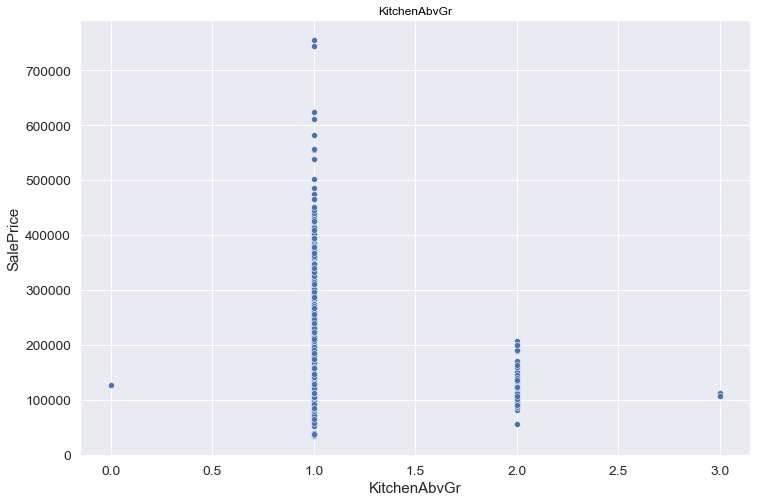

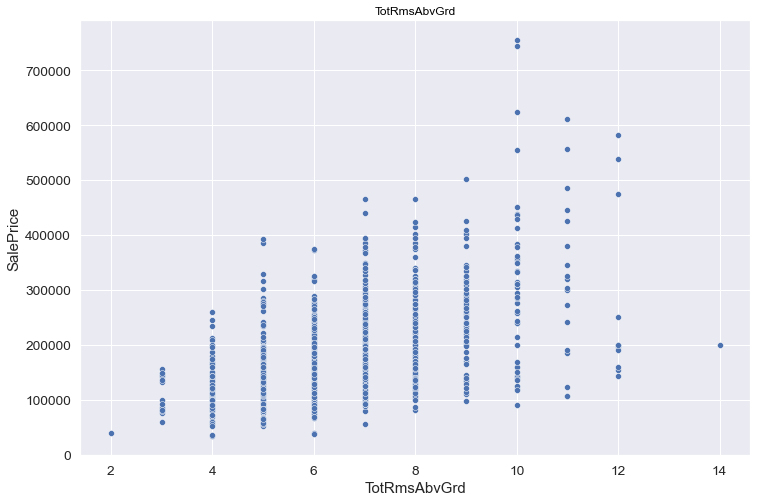

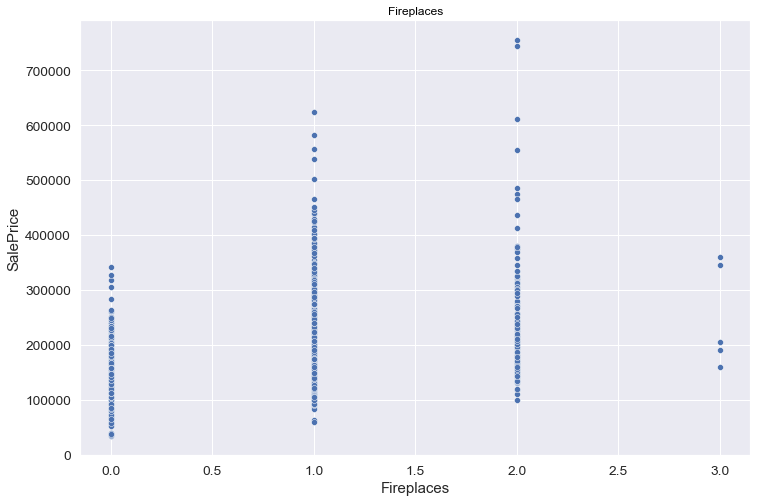

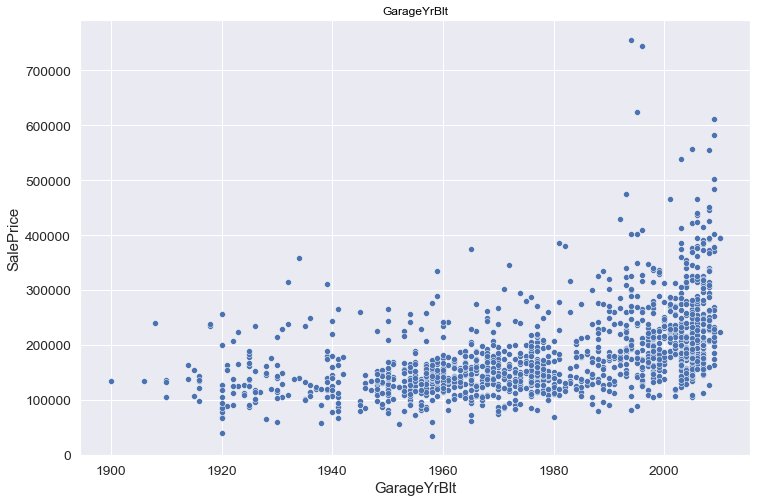

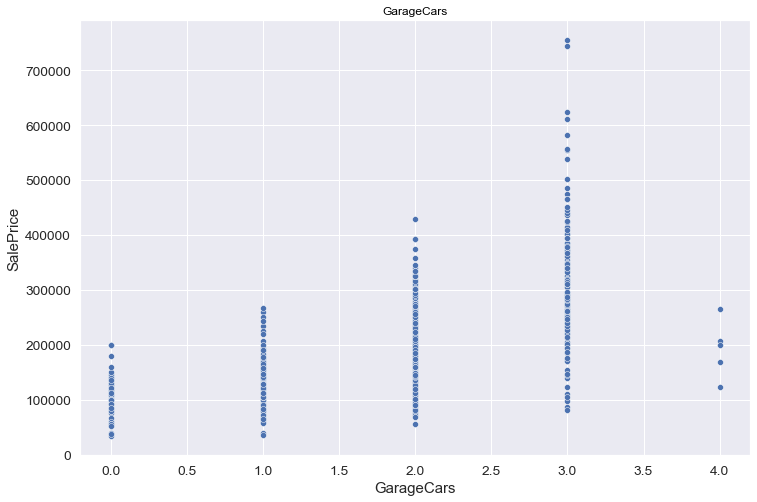

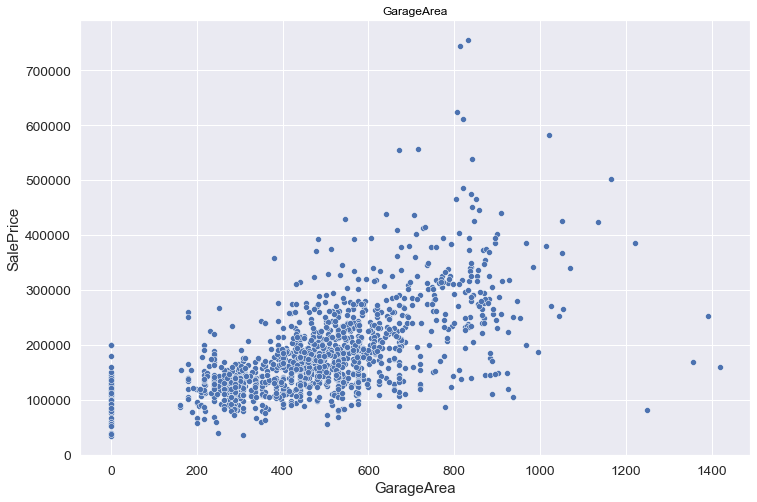

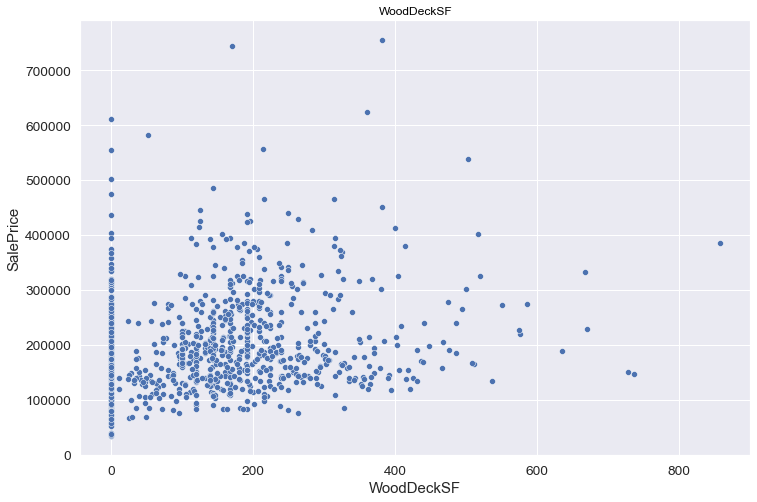

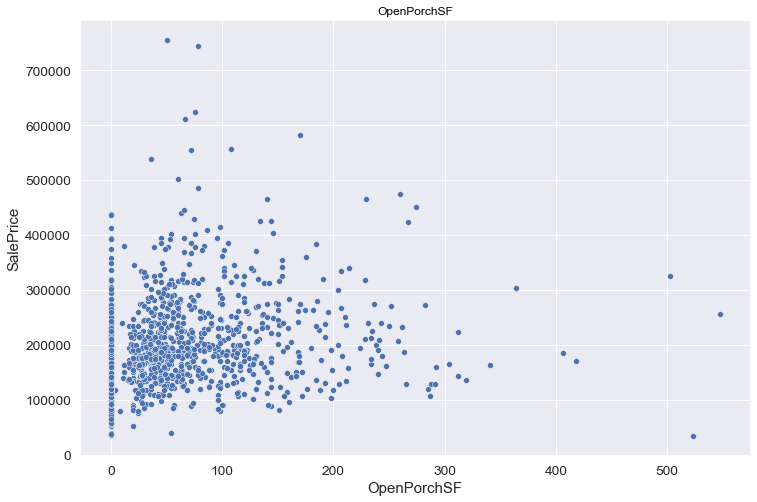

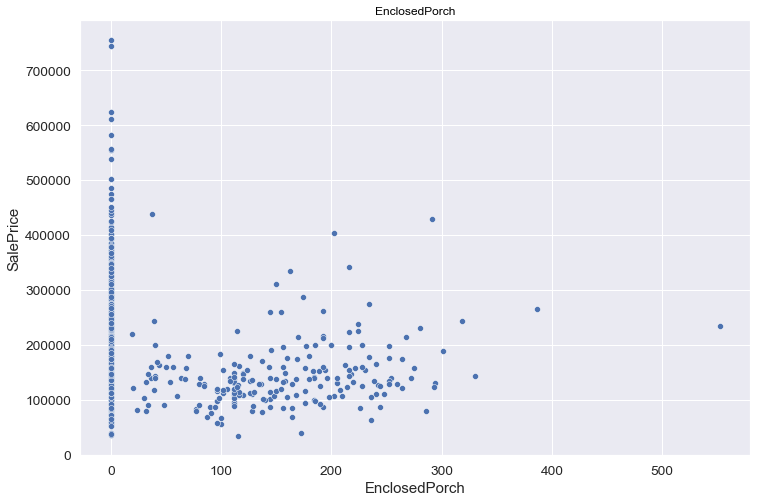

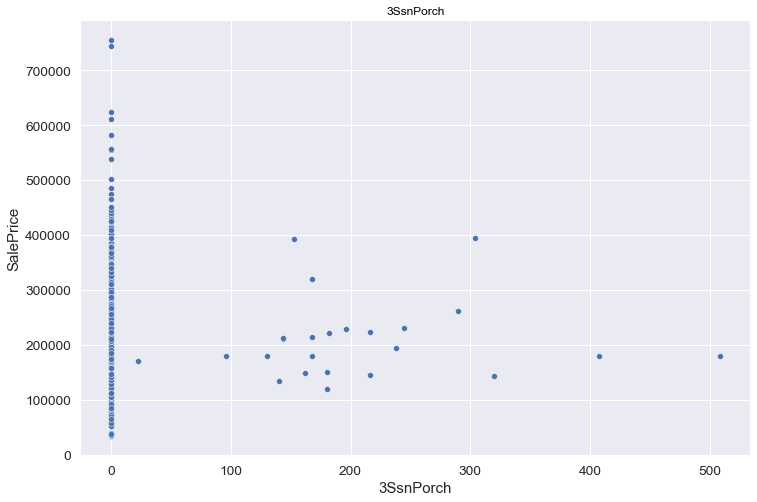

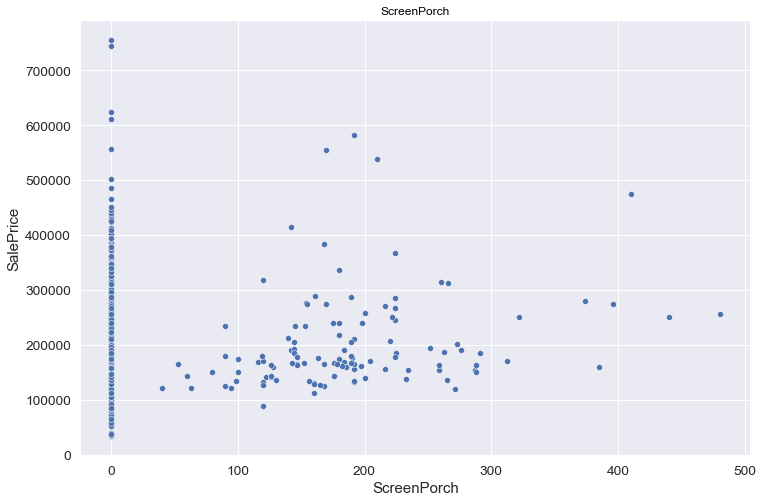

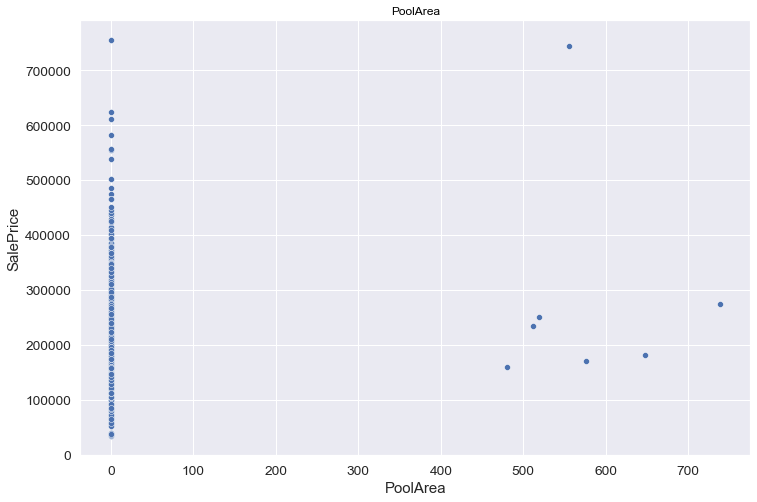

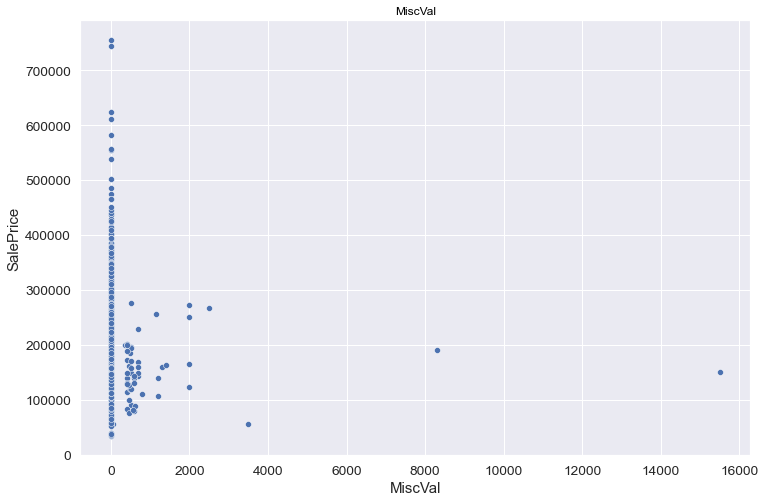

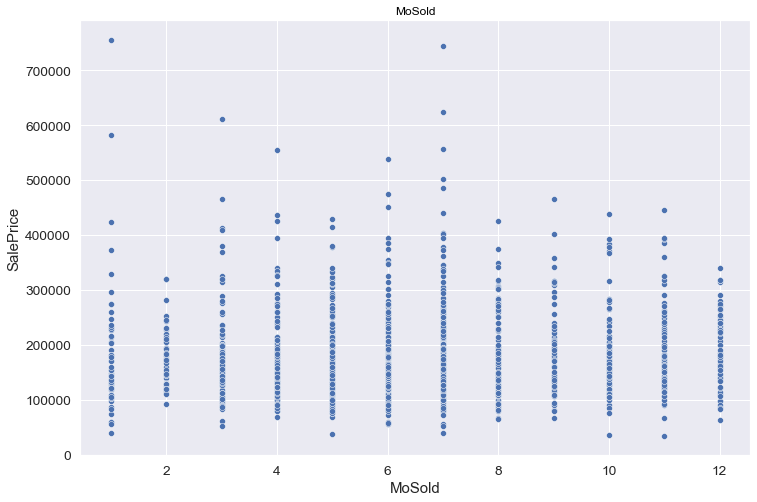

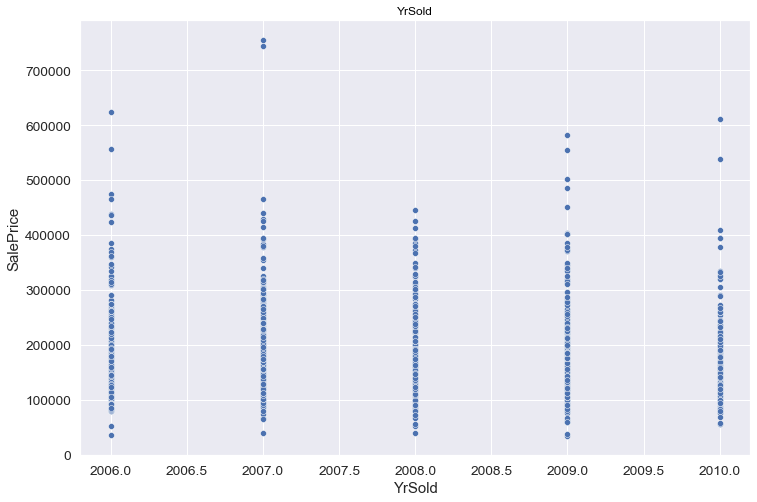

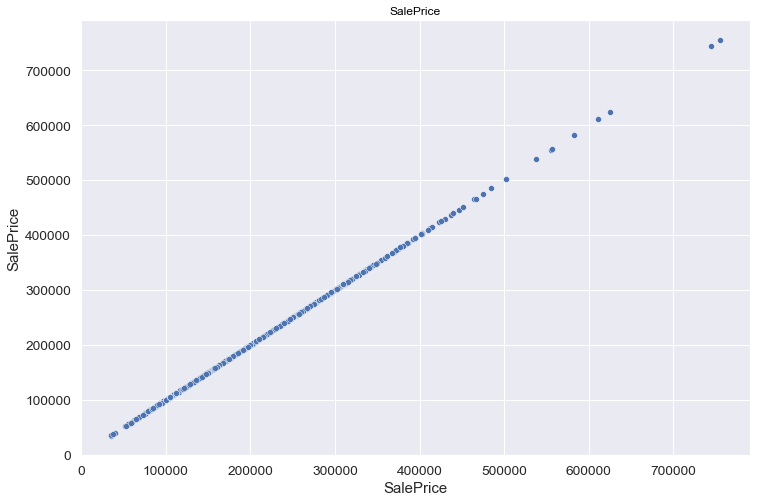

In [154]:
for col in numerical_train:
    f, ax = plt.subplots(figsize=(12, 8))
    sns.scatterplot(x=col, y="SalePrice", data=df_train).set_title(col, fontsize=12, color='Black')
    plt.show()

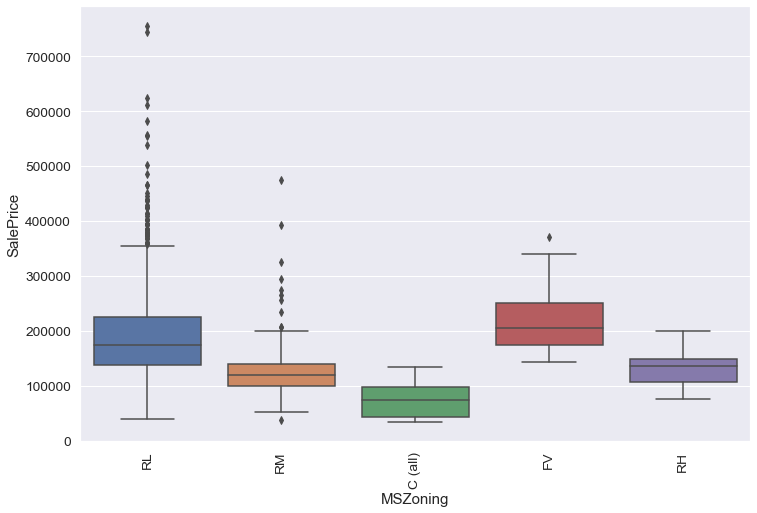

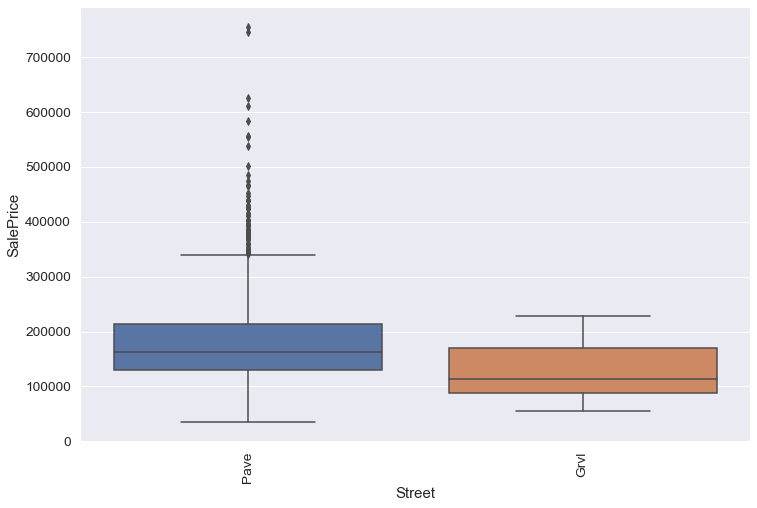

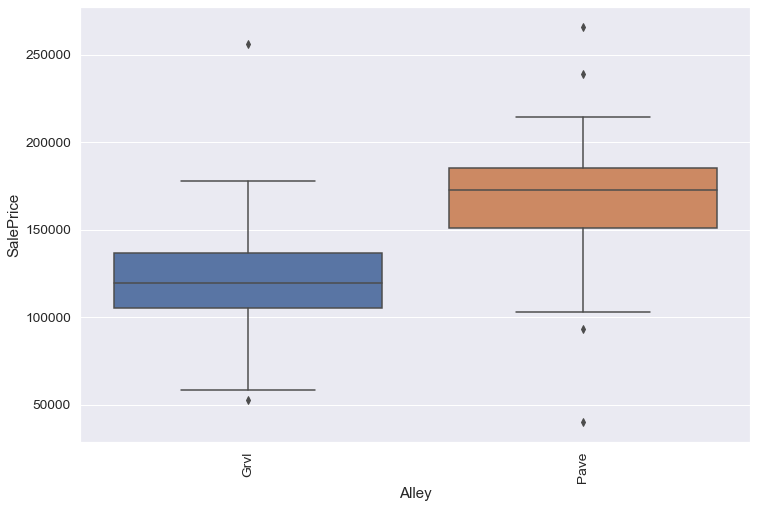

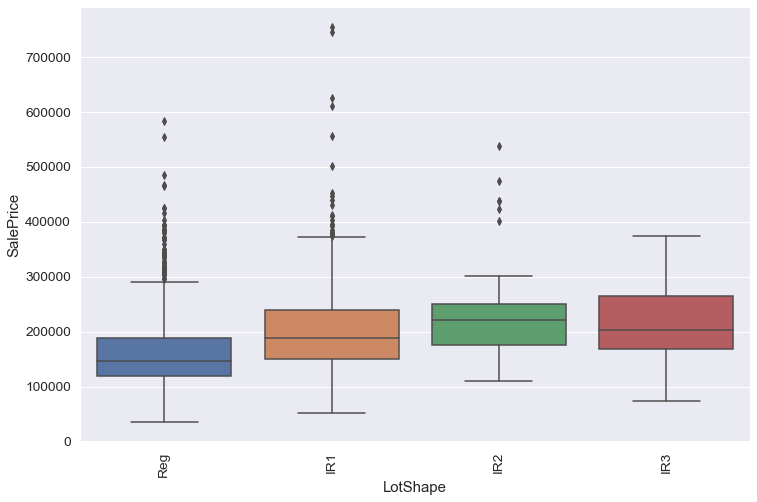

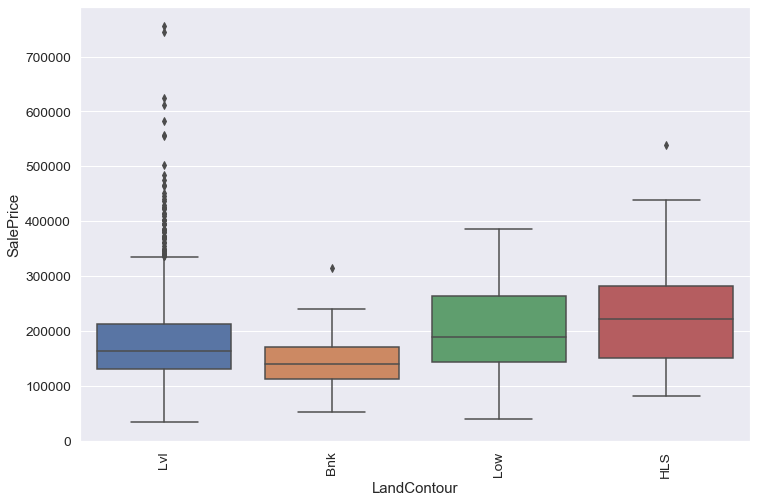

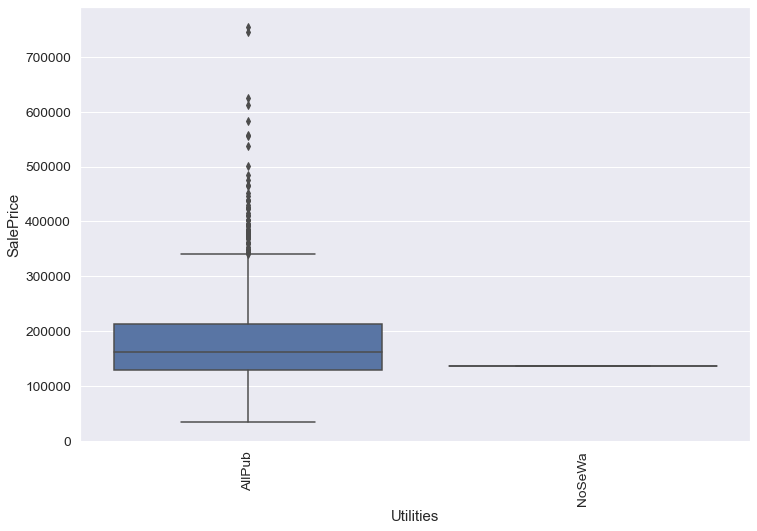

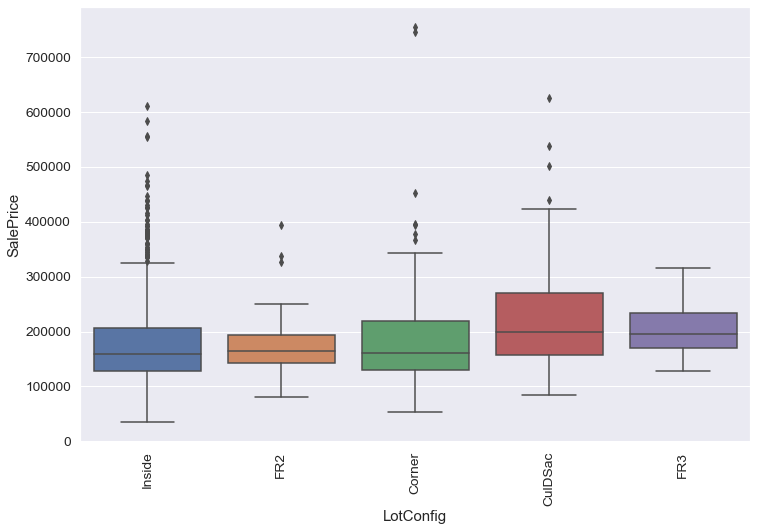

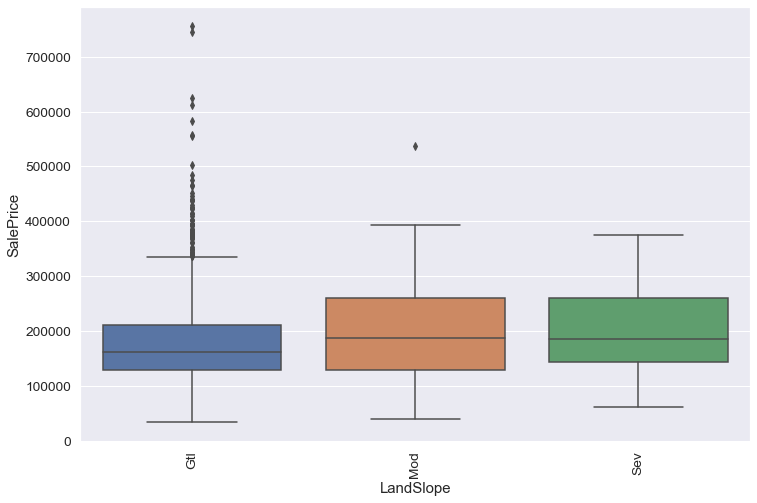

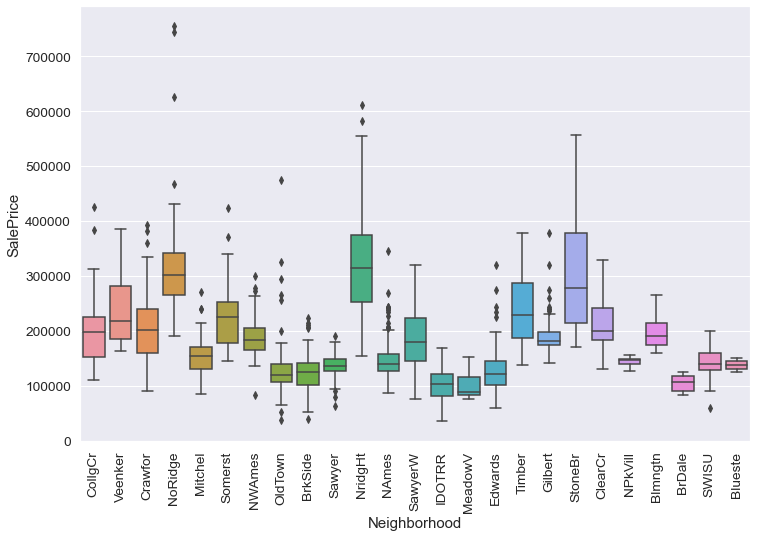

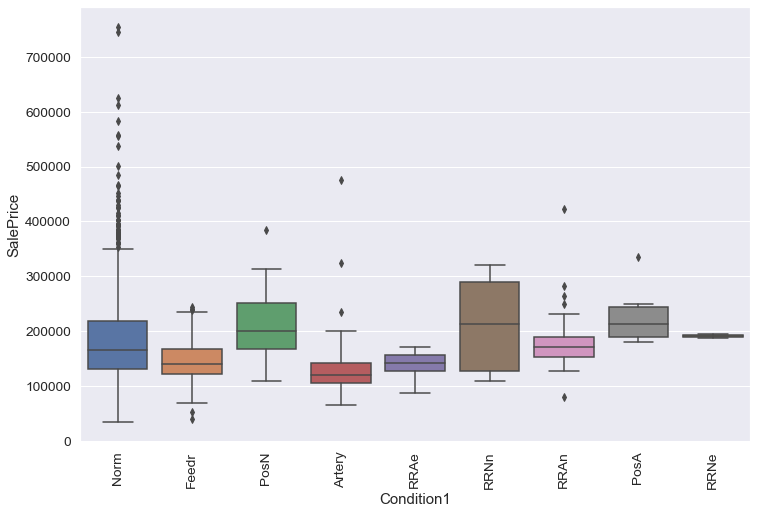

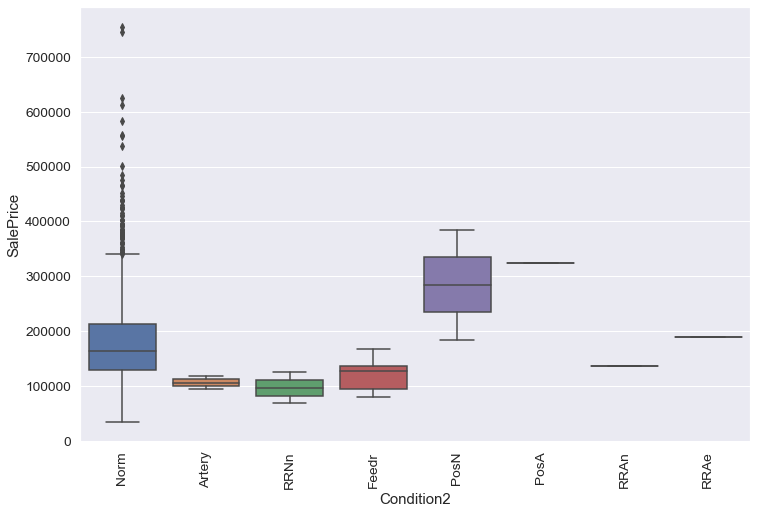

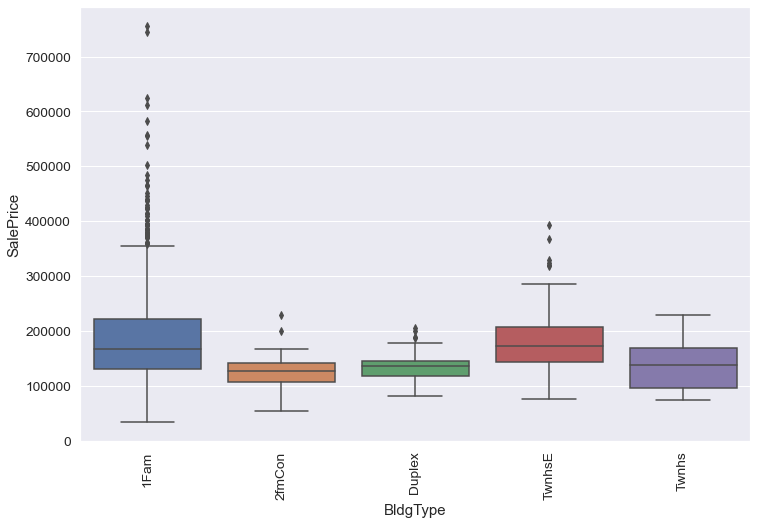

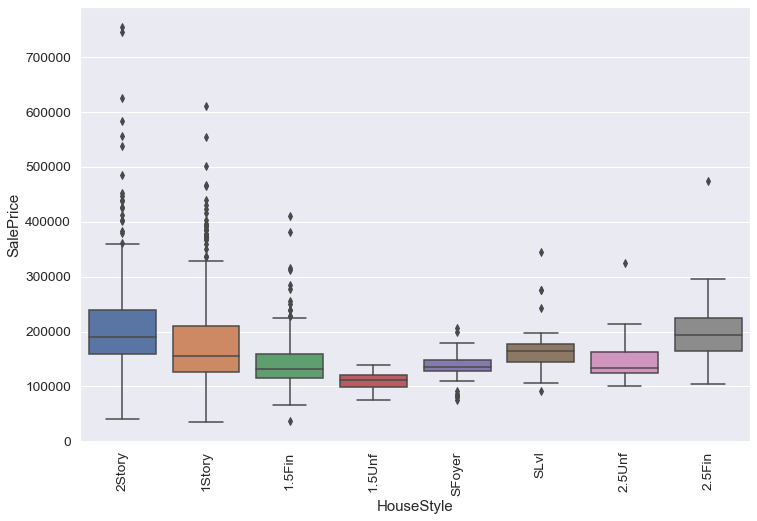

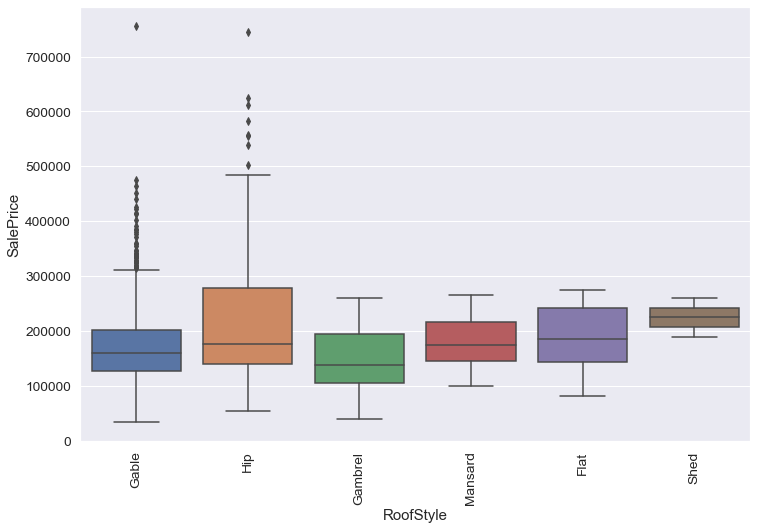

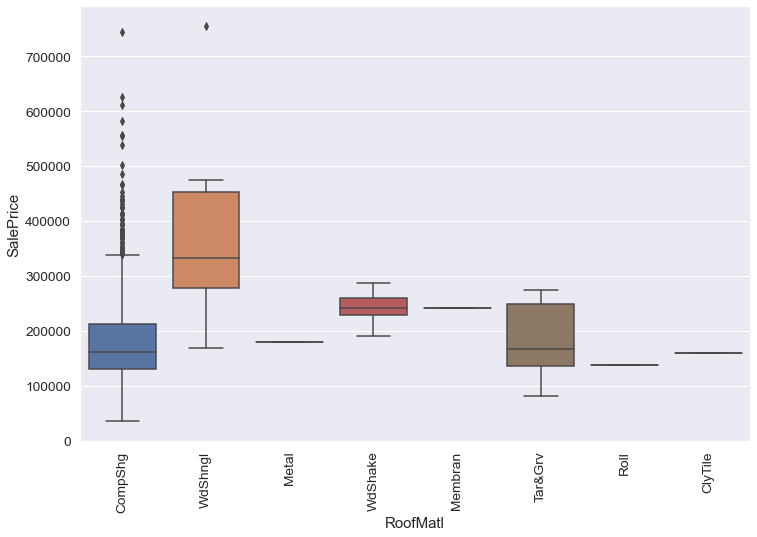

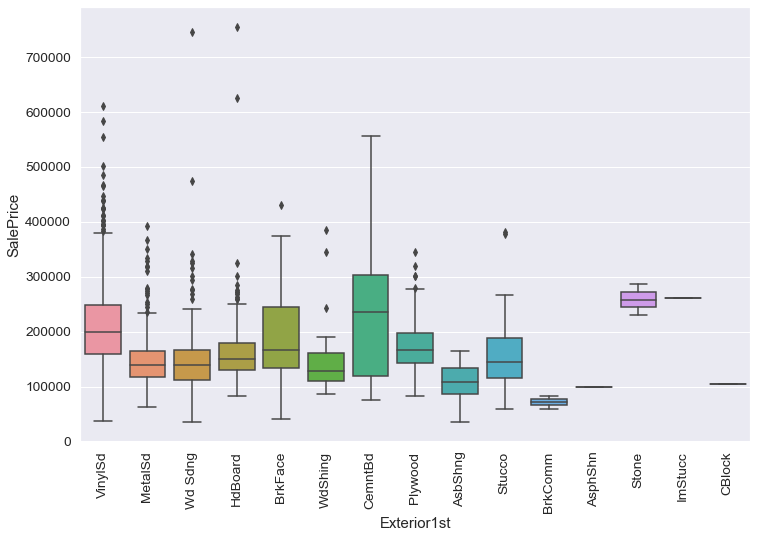

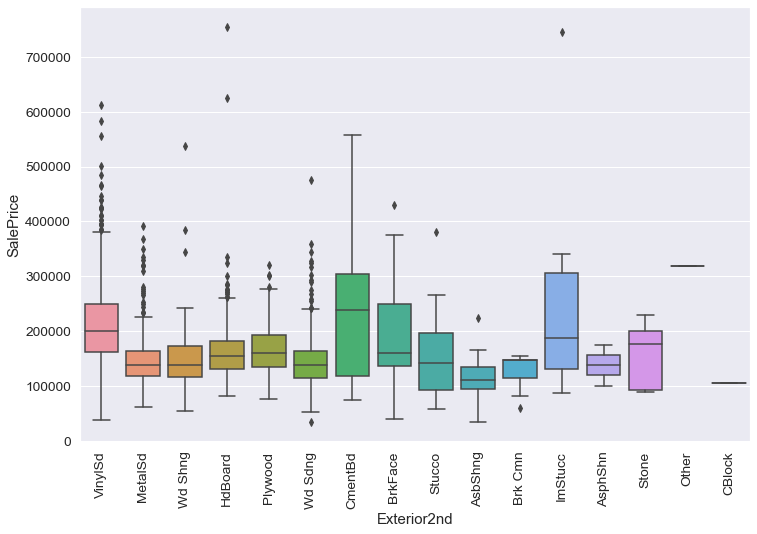

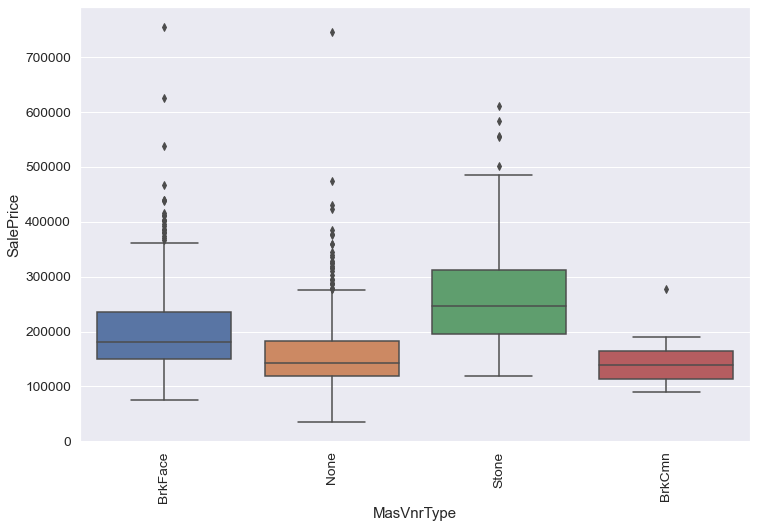

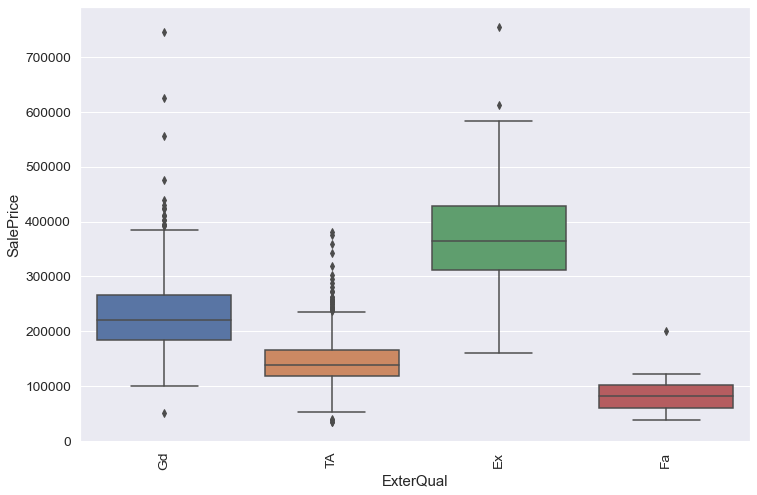

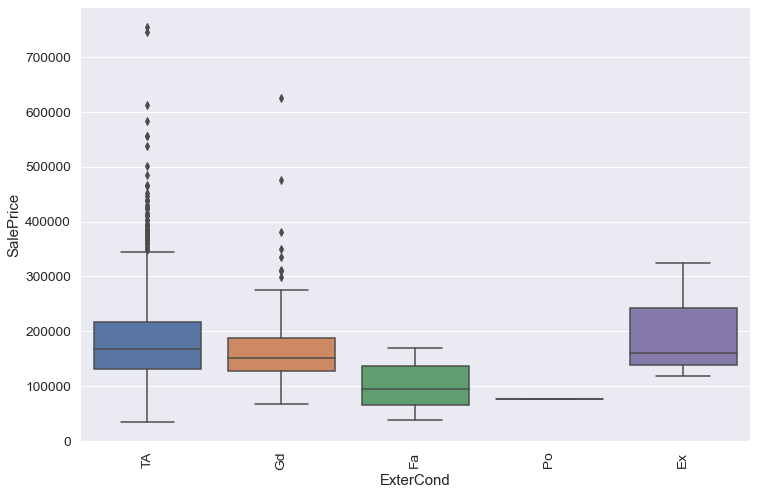

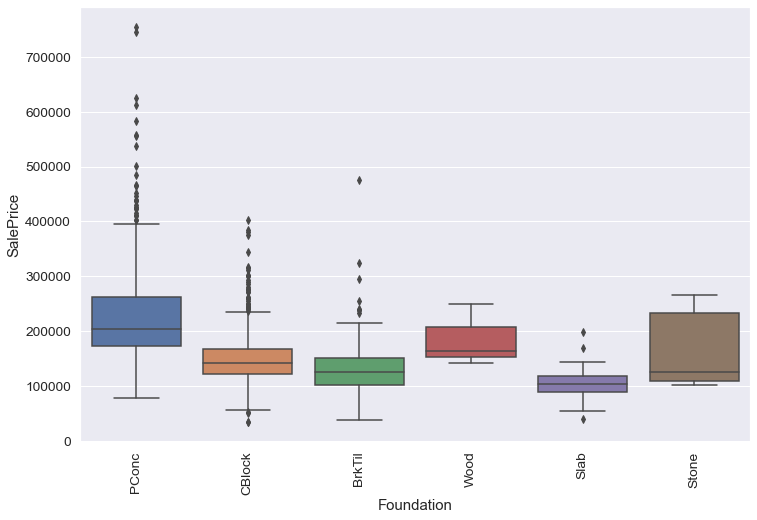

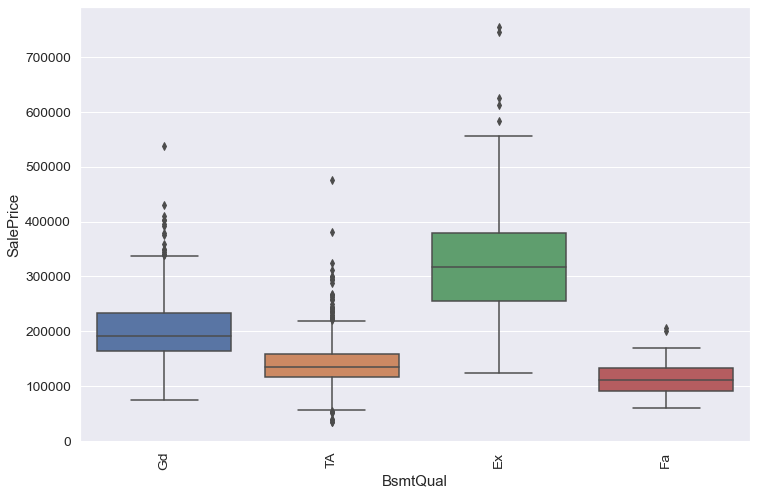

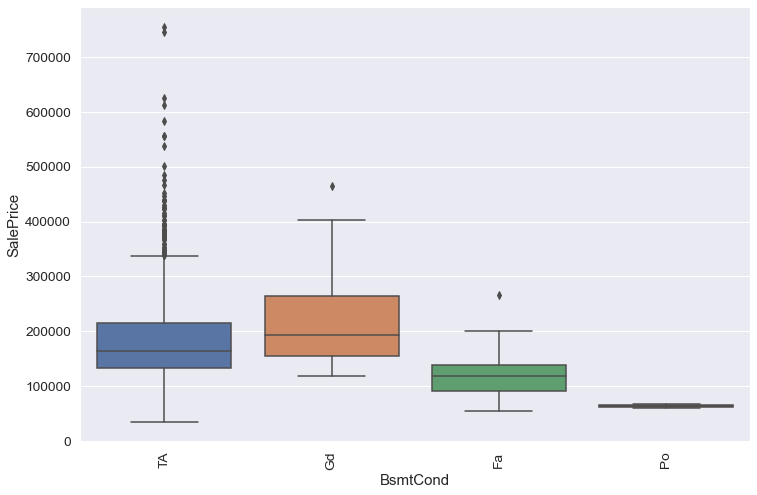

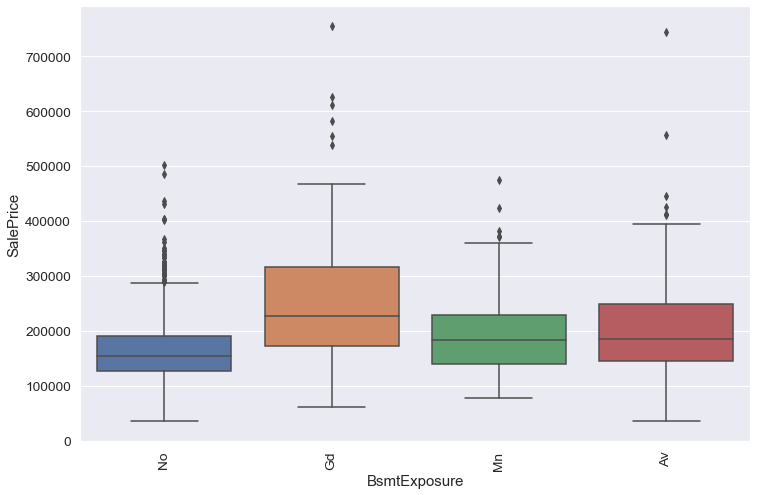

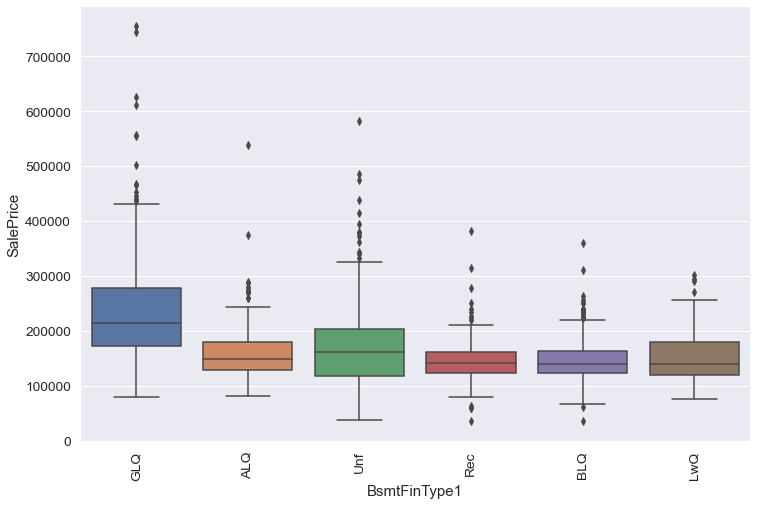

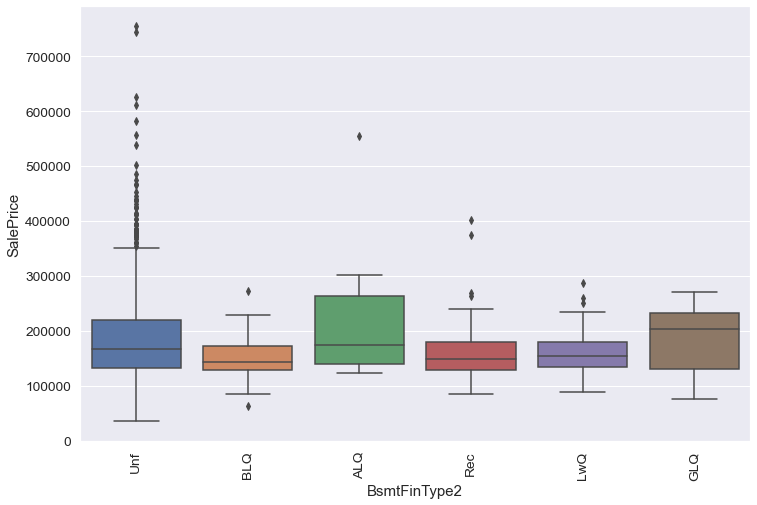

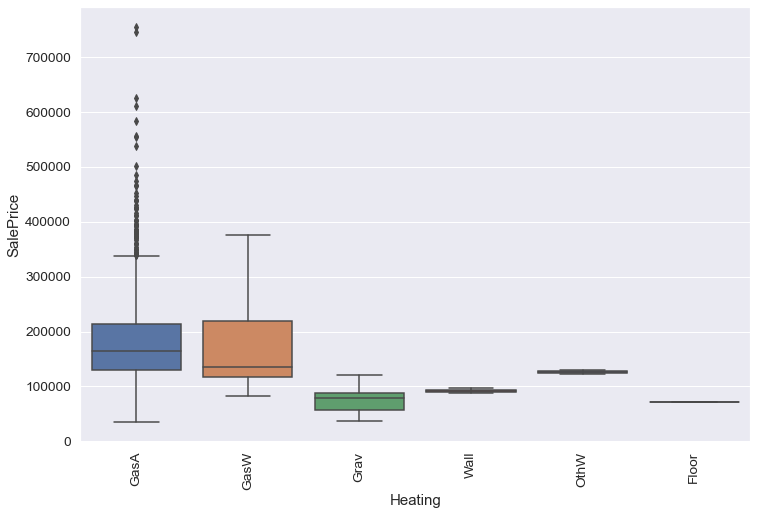

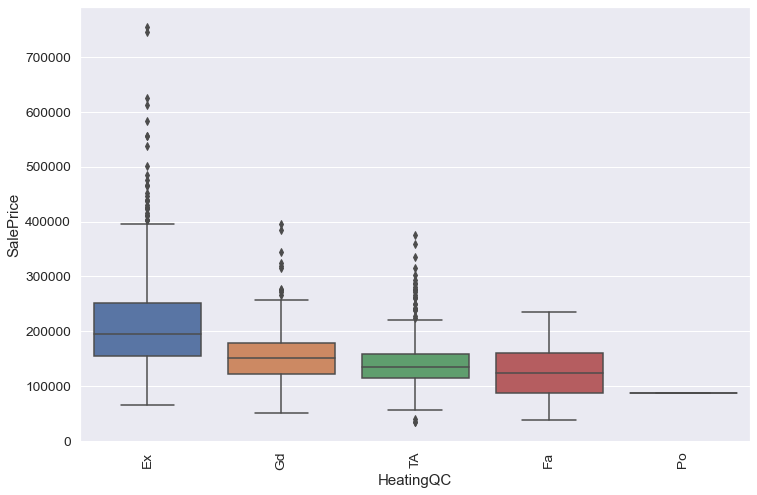

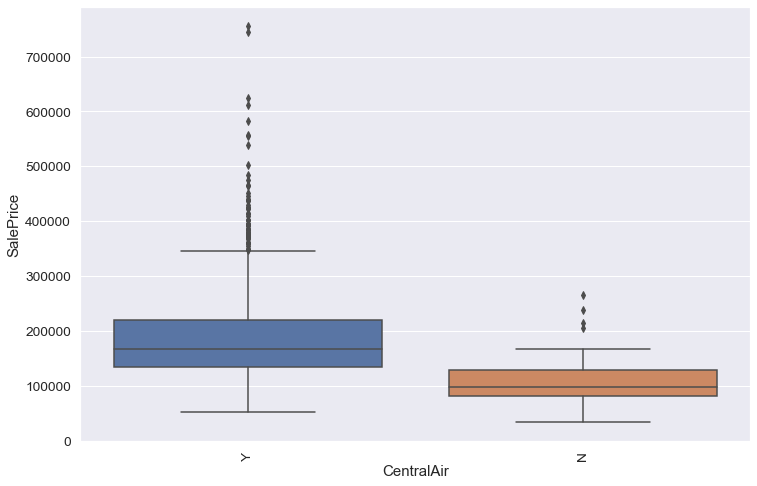

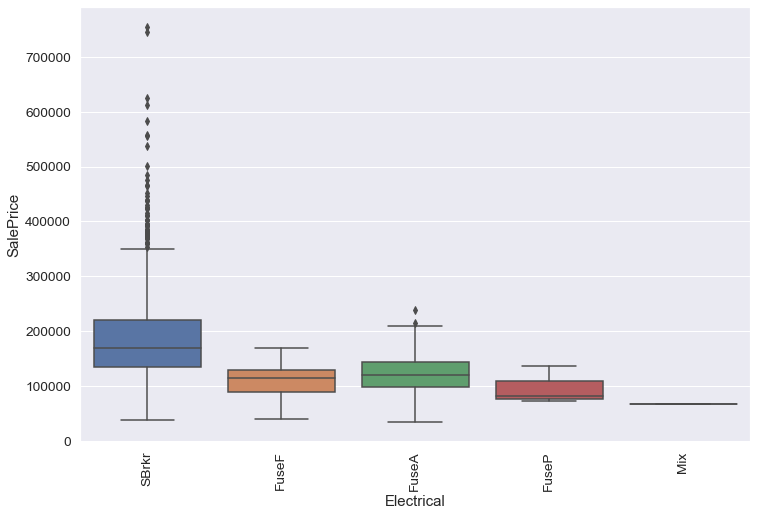

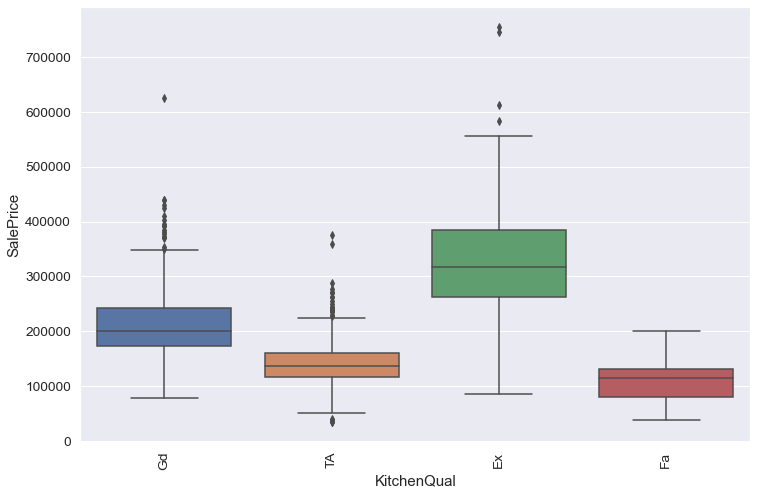

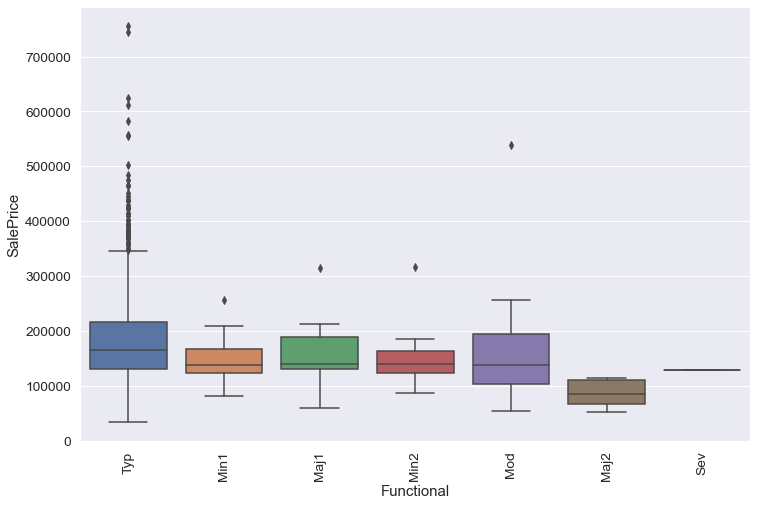

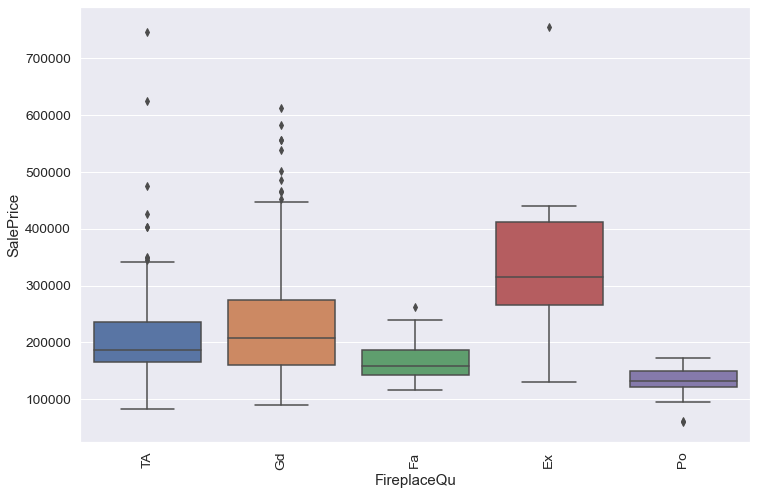

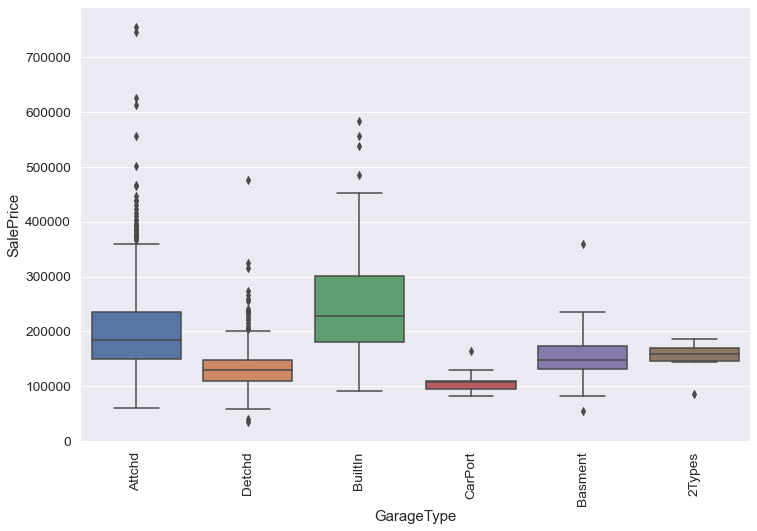

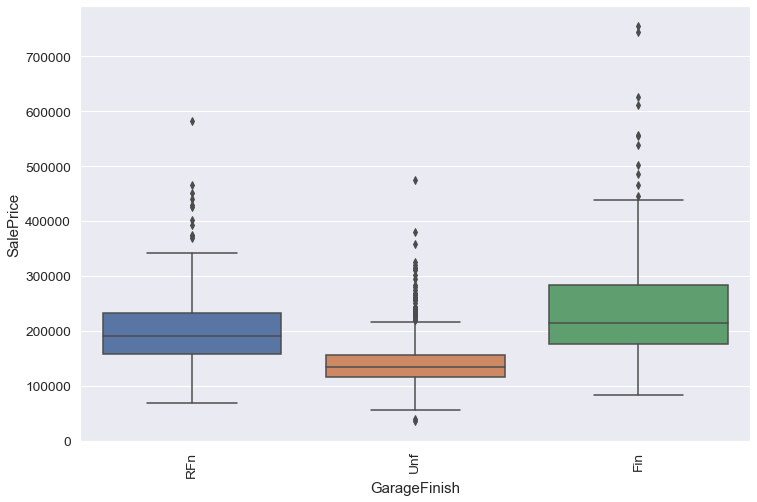

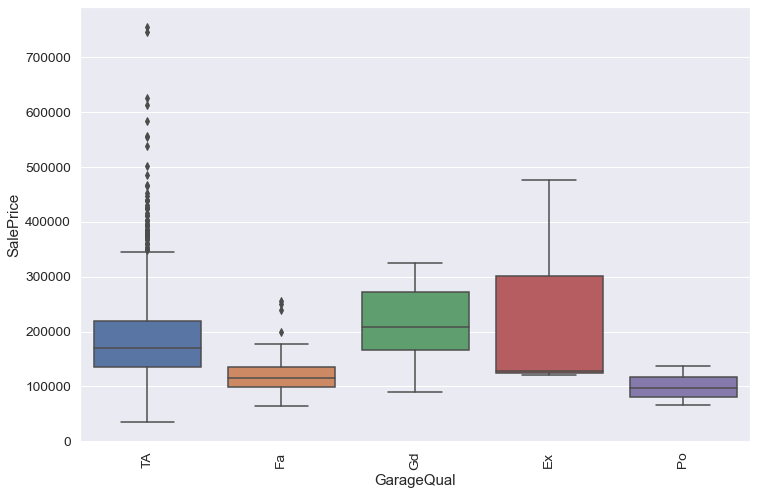

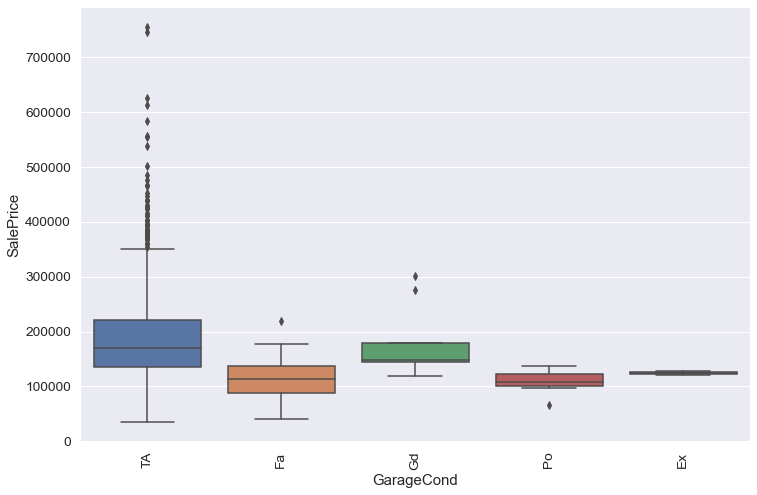

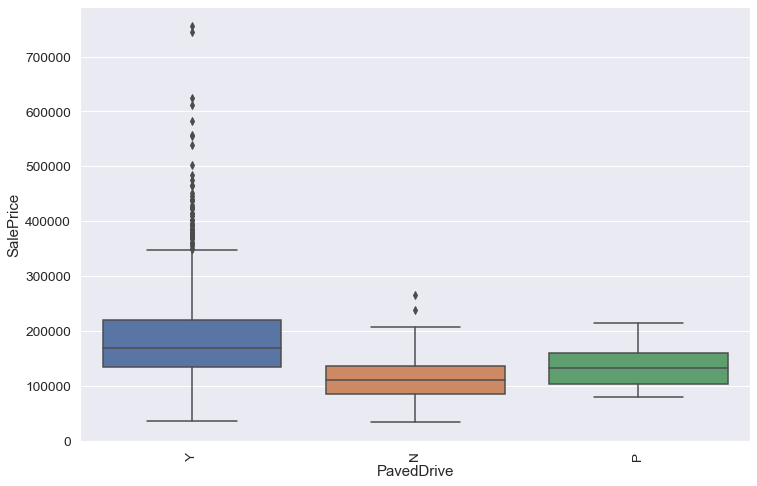

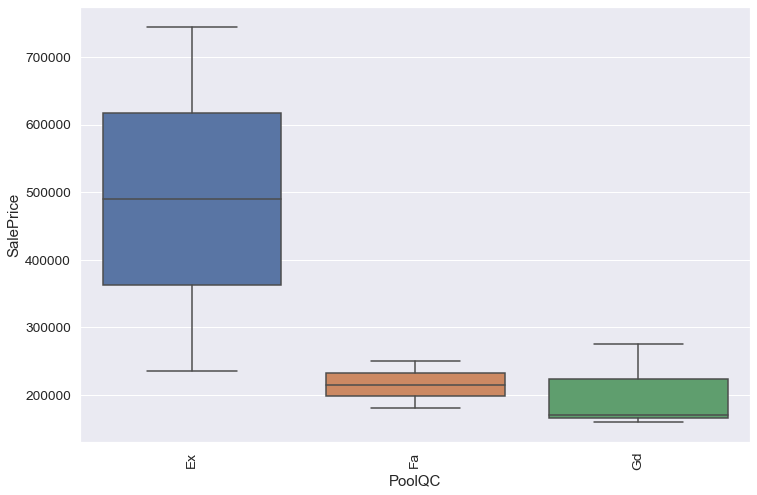

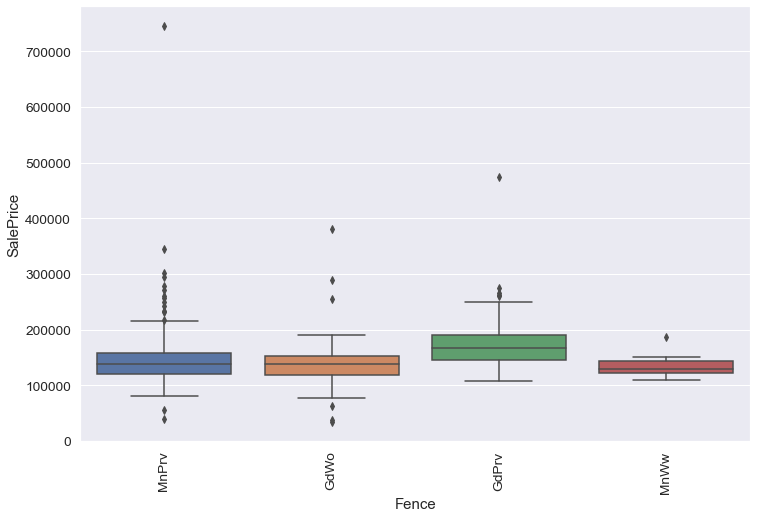

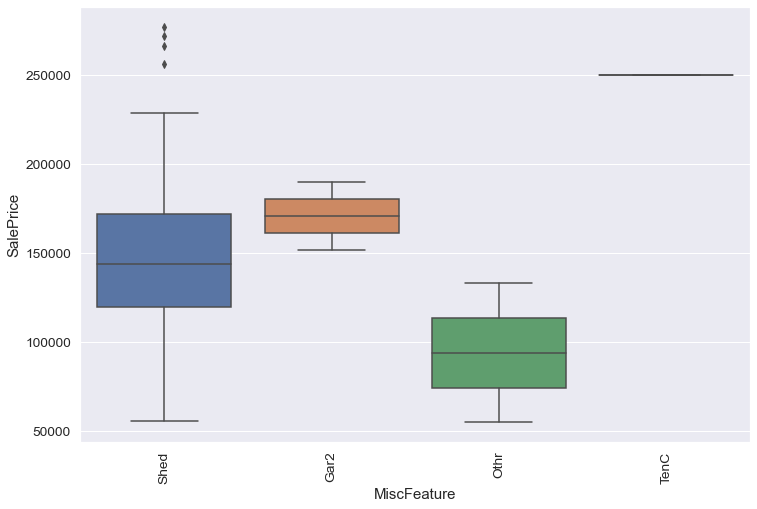

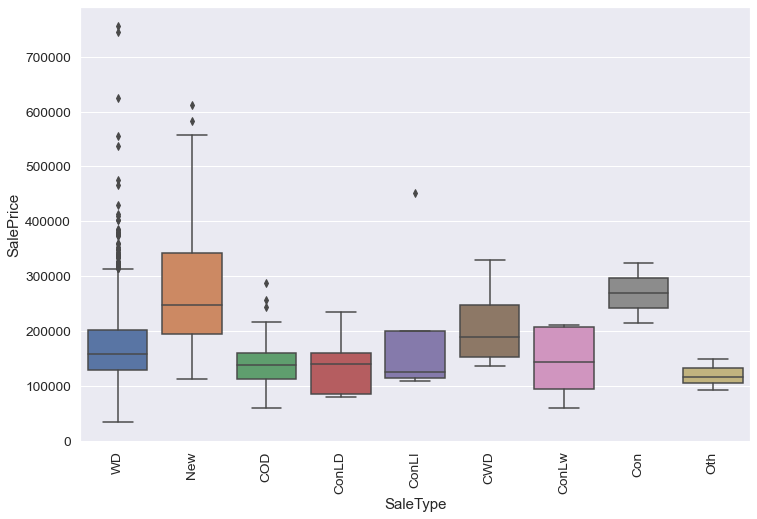

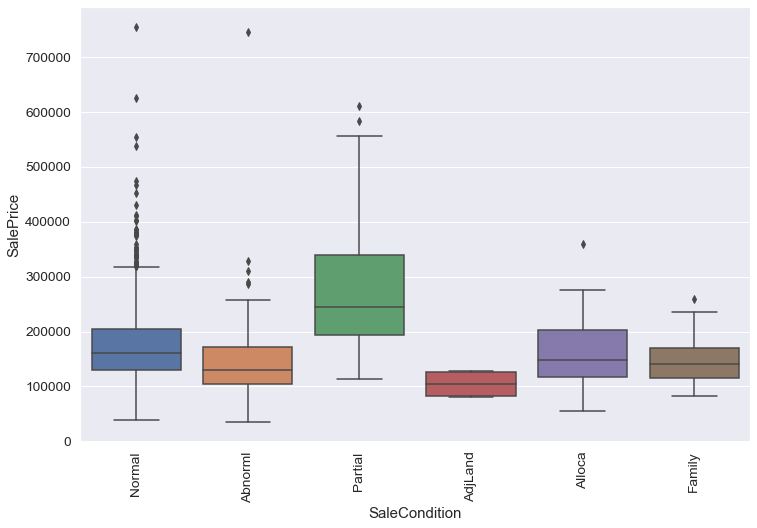

In [155]:
for col in categorical_train:
    data = pd.concat([df_train['SalePrice'], df_train[col]], axis=1)
    f, ax = plt.subplots(figsize=(12, 8))
    fig = sns.boxplot(x=col, y="SalePrice", data=data)
    plt.xticks(rotation=90);


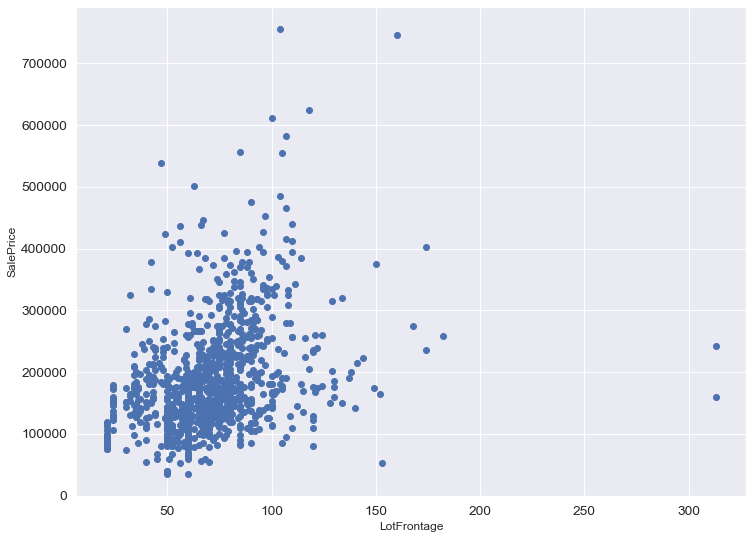

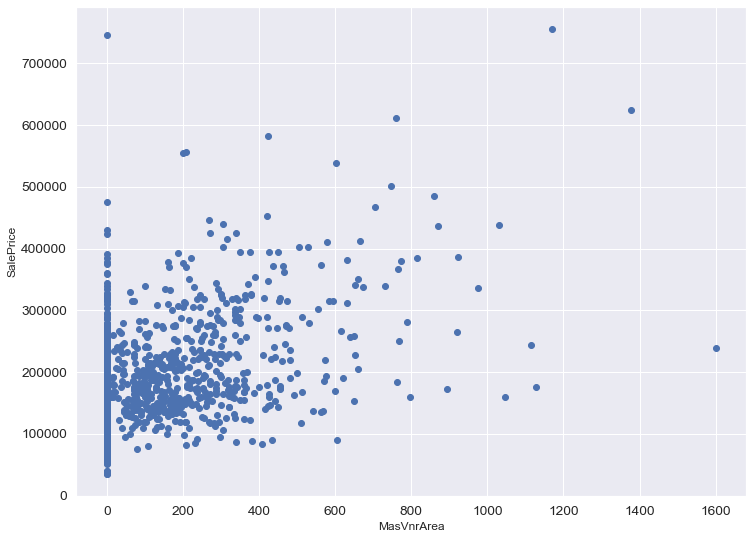

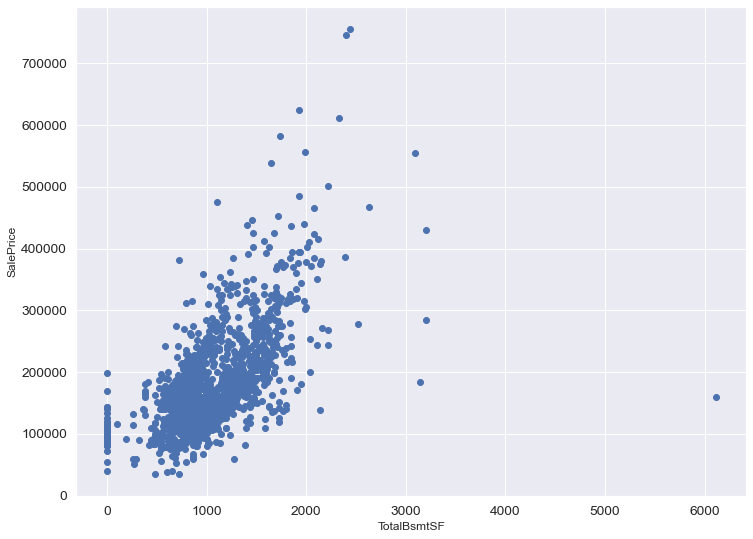

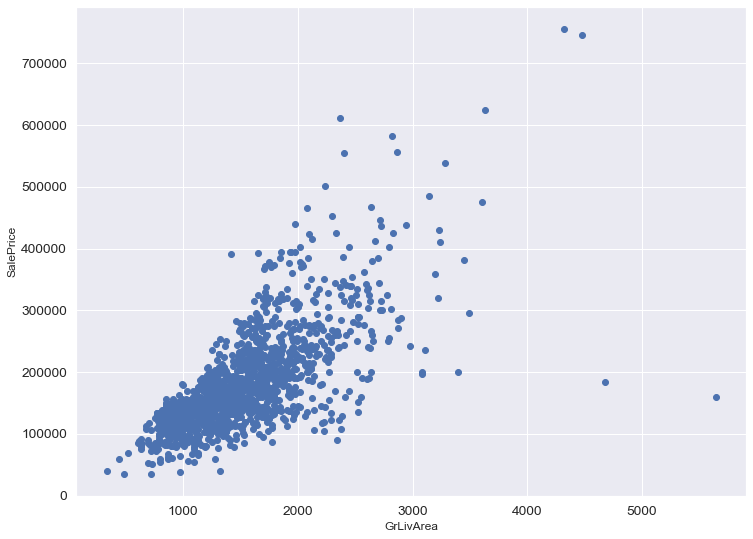

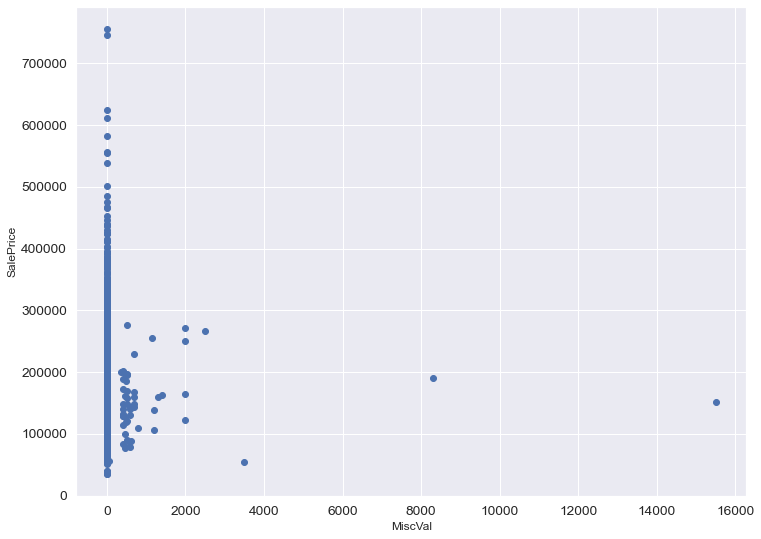

In [156]:
cols_with_outliers = ['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'MiscVal']
outliers_threshold=[300, 1400, 3000, 4500, 8000]
for col in cols_with_outliers:
    # Outliers
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.scatter(x=df_train[col], y=df_train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()

In [157]:
cols_with_outliers = ['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'MiscVal']
cols_with_outliers.index('LotFrontage')

0

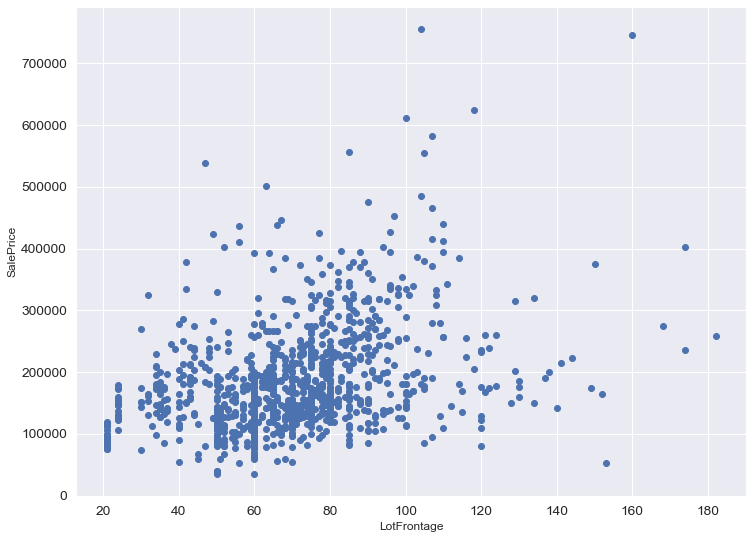

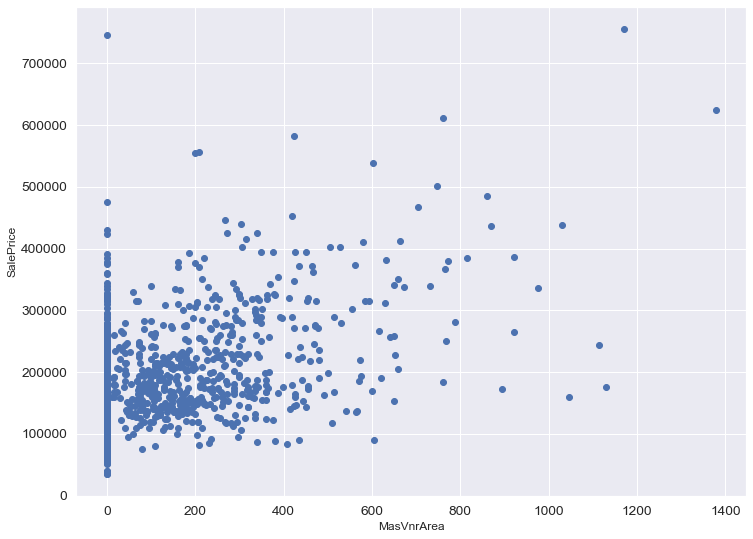

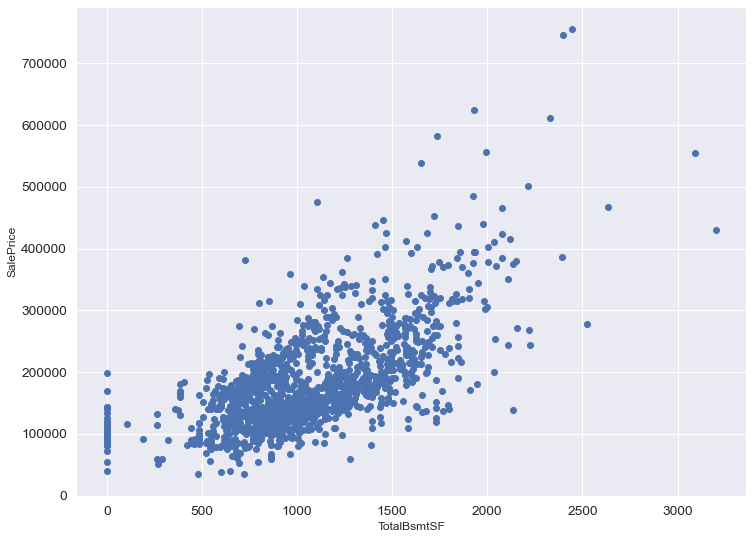

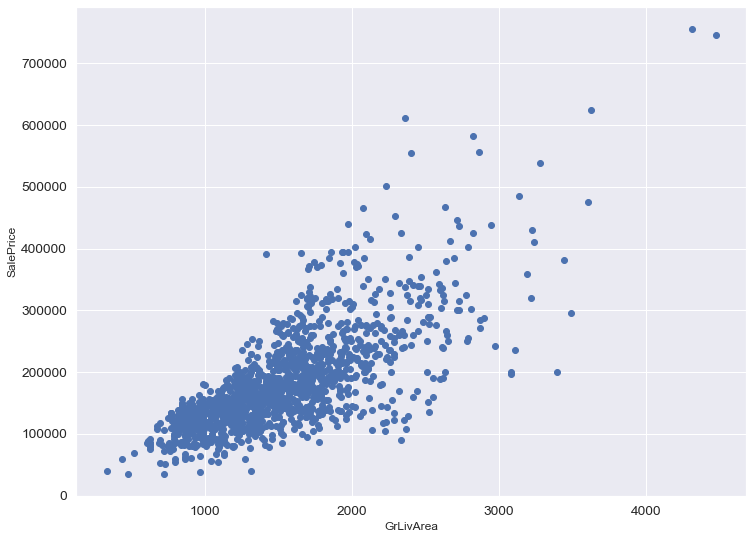

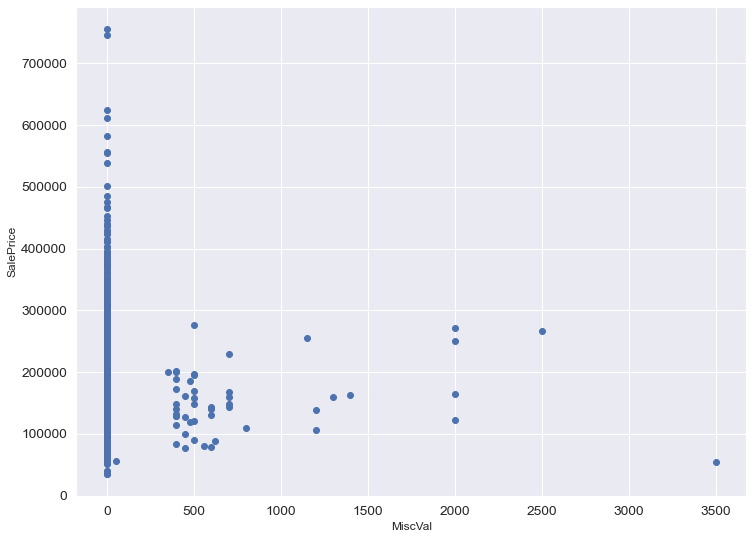

In [158]:
# Remove outliers
for col in cols_with_outliers:
    df_train = df_train.drop(df_train[(df_train[col]>outliers_threshold[cols_with_outliers.index(col)]) & (df_train['SalePrice']<300000)].index)
    
    # Check the graphic again
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.scatter(df_train[col], df_train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()

In [159]:
df_train.shape

(1453, 80)

In [160]:
# After romoving outliers
n_train = df_train.shape[0]
n_test = df_test.shape[0]
print("Number of training data after dropping outliers: {}".format(n_train))
print("Number of test data: {}".format(n_test))

Number of training data after dropping outliers: 1453
Number of test data: 1459


In [161]:
train_missing = df_train.isnull().sum().sort_values(ascending=False)
train_missing_mean = df_train.isnull().mean()
train_missing = train_missing[train_missing != 0]
percent = train_missing_mean.sort_values(ascending=False) * 100
train_missing_sort = pd.concat([train_missing, percent], axis=1, keys=['Number of missing data', 'Percent(%)'])
train_missing_sort.head(20)

Number of missing data  Percent(%)
PoolQC                        1447.0   99.587061
MiscFeature                   1401.0   96.421198
Alley                         1363.0   93.805919
Fence                         1172.0   80.660702
FireplaceQu                    689.0   47.419133
LotFrontage                    257.0   17.687543
GarageYrBlt                     81.0    5.574673
GarageCond                      81.0    5.574673
GarageType                      81.0    5.574673
GarageFinish                    81.0    5.574673
GarageQual                      81.0    5.574673
BsmtExposure                    38.0    2.615279
BsmtCond                        37.0    2.546456
BsmtQual                        37.0    2.546456
BsmtFinType2                    37.0    2.546456
BsmtFinType1                    37.0    2.546456
MasVnrArea                       8.0    0.550585
MasVnrType                       8.0    0.550585
Electrical                       1.0    0.068823
MSSubClass                       NaN    0.000000

In [162]:
train_missing_cols = train_missing.index
train_missing_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

Text(0.5, 1.0, 'Missing training data by feature')

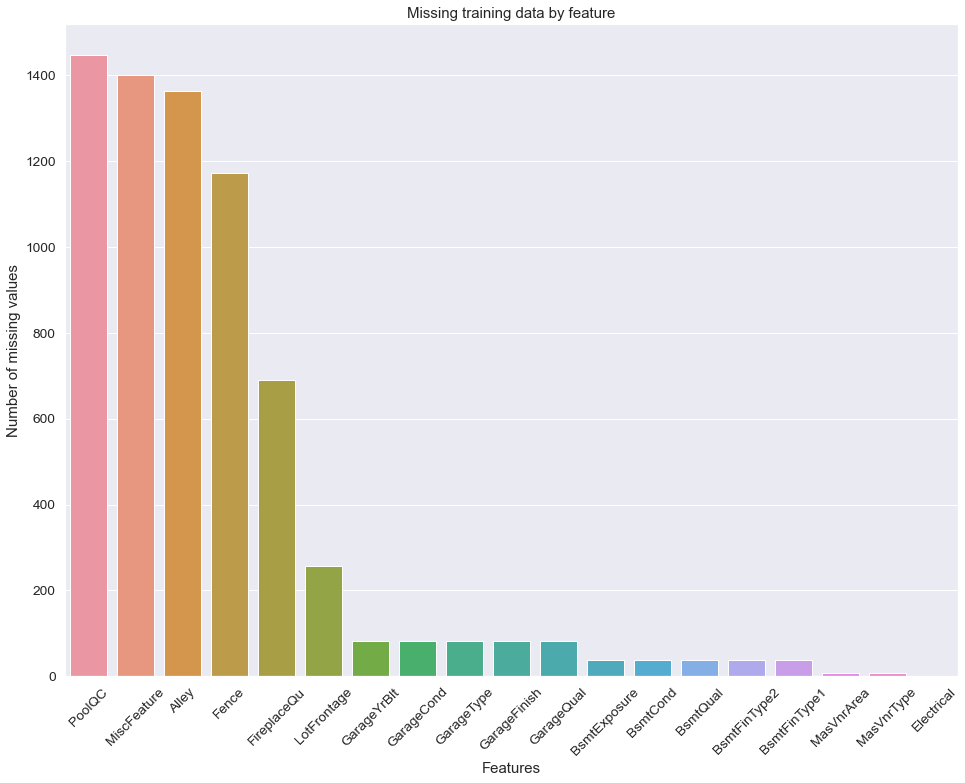

In [163]:
f, ax = plt.subplots(figsize=(16, 12))
plt.xticks(rotation='45')
sns.barplot(x=train_missing.index, y=train_missing)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)
plt.title('Missing training data by feature', fontsize=15)

In [164]:
test_missing = df_test.isnull().sum().sort_values(ascending=False)
test_missing_mean = df_test.isnull().mean()
test_missing = test_missing[test_missing != 0]
percent = test_missing_mean.sort_values(ascending=False) * 100
test_missing_sort = pd.concat([test_missing, percent], axis=1, keys=['Number of missing data', 'Percent(%)'])
test_missing_sort.head(20)

Number of missing data  Percent(%)
PoolQC                        1456.0   99.794380
MiscFeature                   1408.0   96.504455
Alley                         1352.0   92.666210
Fence                         1169.0   80.123372
FireplaceQu                    730.0   50.034270
LotFrontage                    227.0   15.558602
GarageYrBlt                     78.0    5.346127
GarageFinish                    78.0    5.346127
GarageQual                      78.0    5.346127
GarageCond                      78.0    5.346127
GarageType                      76.0    5.209047
BsmtCond                        45.0    3.084304
BsmtExposure                    44.0    3.015764
BsmtQual                        44.0    3.015764
BsmtFinType2                    42.0    2.878684
BsmtFinType1                    42.0    2.878684
MasVnrType                      16.0    1.096642
MasVnrArea                      15.0    1.028101
MSZoning                         4.0    0.274160
Functional                       2.0    0.137080

In [165]:
test_missing_cols = test_missing.index
test_missing_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'Functional', 'BsmtHalfBath',
       'BsmtFullBath', 'Utilities', 'KitchenQual', 'SaleType', 'BsmtFinSF1',
       'GarageCars', 'BsmtUnfSF', 'TotalBsmtSF', 'Exterior2nd', 'Exterior1st',
       'GarageArea', 'BsmtFinSF2'],
      dtype='object')

Text(0.5, 1.0, 'Missing test data by feature')

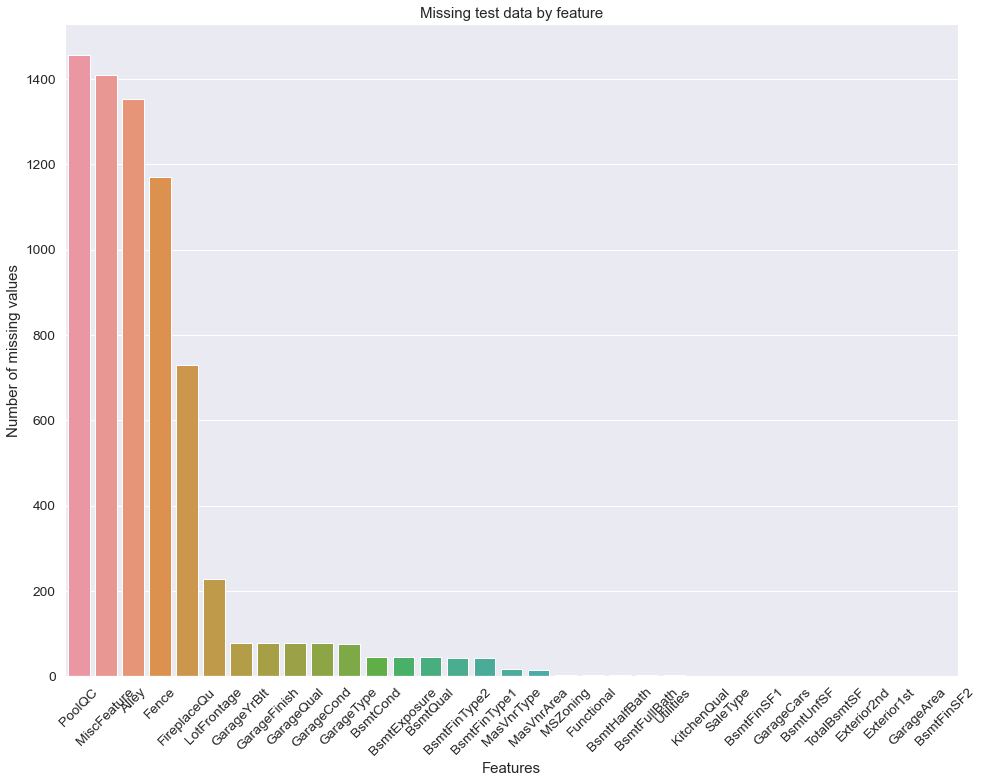

In [166]:
f, ax = plt.subplots(figsize=(16, 12))
plt.xticks(rotation='45')
sns.barplot(x=test_missing.index, y=test_missing)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)
plt.title('Missing test data by feature', fontsize=15)

In [168]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [169]:
# Features with more than 80% missing data
df_train = df_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)
df_test = df_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [170]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [171]:
train_missing_cols = set(train_missing_cols) - set(['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
train_missing_cols = list(train_missing_cols)
train_missing_cols

['GarageYrBlt',
 'BsmtFinType1',
 'BsmtQual',
 'LotFrontage',
 'FireplaceQu',
 'BsmtCond',
 'MasVnrArea',
 'GarageType',
 'BsmtExposure',
 'GarageFinish',
 'GarageQual',
 'Electrical',
 'GarageCond',
 'MasVnrType',
 'BsmtFinType2']

In [172]:
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [173]:
train_missing_numerical = set(train_missing_cols) & set(numerical_cols)
train_missing_numerical = list(train_missing_numerical)
train_missing_numerical

['GarageYrBlt', 'MasVnrArea', 'LotFrontage']

In [174]:
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [175]:
train_missing_categorical = set(train_missing_cols) & set(categorical_cols)
train_missing_categorical = list(train_missing_categorical)
train_missing_categorical

['BsmtFinType1',
 'BsmtQual',
 'FireplaceQu',
 'BsmtCond',
 'GarageType',
 'BsmtExposure',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Electrical',
 'MasVnrType',
 'BsmtFinType2']

In [176]:
test_missing_cols = set(test_missing_cols) - set(['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
test_missing_cols = list(test_missing_cols)
test_missing_cols

['Exterior2nd',
 'GarageCars',
 'Exterior1st',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtFinSF1',
 'Utilities',
 'BsmtCond',
 'MasVnrArea',
 'SaleType',
 'GarageYrBlt',
 'TotalBsmtSF',
 'BsmtHalfBath',
 'FireplaceQu',
 'GarageType',
 'BsmtExposure',
 'GarageFinish',
 'Functional',
 'BsmtFullBath',
 'MasVnrType',
 'BsmtFinType1',
 'MSZoning',
 'KitchenQual',
 'BsmtUnfSF',
 'LotFrontage',
 'BsmtFinSF2',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [177]:
test_missing_numerical = set(test_missing_cols) & set(numerical_cols)
test_missing_numerical = list(test_missing_numerical)
test_missing_numerical

['GarageYrBlt',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'LotFrontage',
 'BsmtHalfBath',
 'BsmtFinSF2',
 'MasVnrArea',
 'GarageCars',
 'GarageArea',
 'BsmtFullBath']

In [178]:
test_missing_categorical = set(test_missing_cols) & set(categorical_cols)
test_missing_categorical = list(test_missing_categorical)
test_missing_categorical

['BsmtFinType1',
 'Exterior2nd',
 'BsmtQual',
 'MSZoning',
 'KitchenQual',
 'Utilities',
 'FireplaceQu',
 'BsmtCond',
 'GarageType',
 'BsmtExposure',
 'Functional',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Exterior1st',
 'MasVnrType',
 'BsmtFinType2',
 'SaleType']

In [187]:
# For numerical features

# LotFrontage: Linear feet of street connected to property: 怕有人亂填 取中位數避免
df_train['LotFrontage'] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())
df_test['LotFrontage'] = df_test.fillna(df_train['LotFrontage'].median())

# MasVnrArea: Masonry veneer area in square feet, assume 0
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(0)

# GarageYrBlt: Year garage was built
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].median())
df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(df_train["GarageYrBlt"].median())
print(df_test['GarageYrBlt'].isnull().sum())
print(df_test['GarageYrBlt'].isnull().sum())

# other numerical features: fill in 0
test_missing_numerical = list(set(test_missing_numerical) - set(train_missing_numerical))
for col in test_missing_numerical:
    df_test[col] = df_test[col].fillna(0)

0
0


In [194]:
df_test[numerical_cols].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [195]:
# For categorical features
for col in train_missing_categorical:
    df_train[col] = df_train[col].fillna('none')

for col in test_missing_categorical:
    df_test[col] = df_test[col].fillna('none')

In [197]:
df_test[test_missing_categorical].isnull().sum()

BsmtFinType1    0
Exterior2nd     0
BsmtQual        0
MSZoning        0
KitchenQual     0
Utilities       0
FireplaceQu     0
BsmtCond        0
GarageType      0
BsmtExposure    0
Functional      0
GarageFinish    0
GarageQual      0
GarageCond      0
Exterior1st     0
MasVnrType      0
BsmtFinType2    0
SaleType        0
dtype: int64